In [1]:
#IMPORTING NEEDED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pickle
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline


In [2]:
# READING TURNSTILE DATASET FROM MTA (2018)
#https://data.ny.gov/Transportation/Turnstile-Usage-Data-2018/bjcb-yee3

path = '/Users/mohamad/Desktop/MTA_PROJECT/Turnstile_Usage_Data__2018.csv'
col_name_new = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
MTA_data_2018 = pd.read_csv(path, sep=",", header=0, names = col_name_new)

In [103]:
# READING THE ARRESTS DATASET 
#http://localhost:8888/edit/Desktop/MTA_PROJECT/Turnstile_Usage_Data__2018.csv

path = 'https://raw.githubusercontent.com/NickRothbacher/nyc-fare-evasion/master/data/arrests_and_turns.csv'
col_name_new = ['ARREST_KEY','ARREST_DATE','ARREST__BORO','JURISDICTION_CODE','ARREST_PRECINCT','AGE_GROUP','PERP_SEX','PERP_RACE','Latitude','Longitude','geometry',
                 'line','name','notes','objectid','ENTRIES','EXITS']
ARRESTASSIGNED = pd.read_csv(path, sep=",", header=0, names = col_name_new)

## DATA CLEANING


In [104]:
# STRIPPING THE WHITE SPACES FOR BOTH DATASETS
MTA_data_2018.columns = [column.strip() for column in MTA_data_2018.columns]
ARRESTASSIGNED.columns = [column.strip() for column in ARRESTASSIGNED.columns]

In [5]:
#EXPLORING DATA
MTA_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111471 entries, 0 to 10111470
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 848.6+ MB


In [6]:
ARRESTASSIGNED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195888 entries, 0 to 268319
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         195888 non-null  int64  
 1   ARREST_DATE        195888 non-null  object 
 2   ARREST__BORO       195888 non-null  object 
 3   JURISDICTION_CODE  195888 non-null  int64  
 4   ARREST_PRECINCT    195888 non-null  float64
 5   AGE_GROUP          195888 non-null  object 
 6   PERP_SEX           195888 non-null  object 
 7   PERP_RACE          195888 non-null  object 
 8   Latitude           195888 non-null  float64
 9   Longitude          195888 non-null  float64
 10  geometry           195888 non-null  object 
 11  line               195888 non-null  object 
 12  name               195888 non-null  object 
 13  notes              195888 non-null  object 
 14  objectid           195888 non-null  float64
 15  ENTRIES            195888 non-null  float64
 16  EX

In [105]:
# DROPPING THE UNNECCESARY COLUMNS LIKE JURISDICTION CODE , ARREST PERCINT , LINE , ARREST KEY AND GEOMETRY
ARRESTASSIGNED = ARRESTASSIGNED.drop(["ARREST_KEY",'objectid','EXITS','ENTRIES','Longitude','Latitude', "JURISDICTION_CODE",'ARREST_PRECINCT','geometry', 'line','index'], axis=1, errors="ignore")

In [10]:
#ADDING A NEW COLUMN TO COMBINE THE DATE AND TIME
MTA_data_2018["DATE_TIME"] = pd.to_datetime(MTA_data_2018.DATE + " " + MTA_data_2018.TIME, format="%m/%d/%Y %H:%M:%S")

In [11]:
# THE READINGS IN EACH DAY THROUGHOUT THE YEAR
MTA_data_2018.DATE.value_counts().sort_index()

01/01/2018    28157
01/02/2018    28103
01/03/2018    28104
01/04/2018    31032
01/05/2018    28987
              ...  
12/28/2017    28237
12/28/2018    59186
12/29/2017    27890
12/30/2017    28206
12/31/2017    28076
Name: DATE, Length: 350, dtype: int64

In [12]:
#VIEWING DATA
MTA_data_2018.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A033,R170,02-00-04,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,4927946,3748371,2018-12-28
1,A033,R170,02-00-05,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,15598097,6250334,2018-12-28
2,A033,R170,02-00-05,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,15598097,6250334,2018-12-28
3,A033,R170,02-06-01,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,70294362,20274025,2018-12-28
4,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,1806541,2182381,2018-12-28


In [13]:
#VIEWING DATA
MTA_data_2018.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
10111466,PTH22,R540,00-01-00,PATH NEW WTC,1,PTH,12/23/2017,23:54:36,REGULAR,99297,24068,2017-12-23 23:54:36
10111467,PTH06,R546,00-00-03,PAVONIA/NEWPORT,1,PTH,12/23/2017,23:55:47,REGULAR,4417,2955,2017-12-23 23:55:47
10111468,PTH07,R550,00-02-02,CITY / BUS,1,PTH,12/23/2017,23:58:16,REGULAR,12121,56099,2017-12-23 23:58:16
10111469,PTH06,R546,00-00-06,PAVONIA/NEWPORT,1,PTH,12/23/2017,23:58:34,REGULAR,174521,680268,2017-12-23 23:58:34
10111470,PTH03,R552,00-00-07,JOURNAL SQUARE,1,PTH,12/23/2017,23:59:34,REGULAR,4020504,1291262,2017-12-23 23:59:34


In [14]:
#VIEWING DATA
ARRESTASSIGNED.head()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,name,notes
0,2017-12-31,M,25-44,F,WHITE HISPANIC,77th St,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,2017-12-31,B,25-44,M,WHITE HISPANIC,Prospect Ave,"2-all times, 5-all times exc nights, skips rus..."
2,2017-12-30,B,25-44,M,BLACK,Kingsbridge Rd,"B-rush hours, D-all times"
3,2017-12-30,M,25-44,M,BLACK,145th St,"A,D-all times, B-weekdays and evenings, C-all ..."
4,2017-12-30,M,45-64,M,BLACK,W 4th St - Washington Sq (Upper),"A,E-all times, C-all times exc nights"


In [15]:
#VIEWING DATA
ARRESTASSIGNED.tail()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,name,notes
268315,2018-01-02,M,25-44,M,BLACK,49th St,"N-all times, Q-all times exc weekends, R-all t..."
268316,2018-01-02,M,45-64,M,BLACK HISPANIC,8th Ave,L-all times
268317,2018-01-02,B,18-24,M,BLACK HISPANIC,Kingsbridge Rd,"B-rush hours, D-all times"
268318,2018-01-01,M,18-24,M,WHITE HISPANIC,42nd St - Port Authority Bus Term,"A,E-all times, C-all times exc nights"
268319,2018-01-01,M,18-24,M,BLACK,110th St,"4 nights, 6-all times, 6 Express-weekdays AM s..."


In [16]:
#FOR IDENTIFYING UNIQUE TURNSTILES
MTA_data_2018['TURNSTILE'] = MTA_data_2018['C/A'] + '-' + MTA_data_2018['UNIT'] + '-' + MTA_data_2018['SCP']+ '-' + MTA_data_2018['STATION']

In [17]:
#SANITY CHECK
(MTA_data_2018.groupby(['TURNSTILE','DATE_TIME']).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,TURNSTILE,DATE_TIME,ENTRIES
9910224,TRAM2-R469-00-05-01-RIT-ROOSEVELT,2018-12-28 20:00:00,2
4180335,N333B-R141-02-00-03-FOREST HILLS 71,2018-12-27 12:00:00,2
7616151,R237-R046-01-00-05-GRD CNTRL-42 ST,2018-12-28 03:00:00,2
7616152,R237-R046-01-00-05-GRD CNTRL-42 ST,2018-12-28 07:00:00,2
7616153,R237-R046-01-00-05-GRD CNTRL-42 ST,2018-12-28 11:00:00,2


In [18]:
#GET RID OF DUPLICATES
MTA_data_2018.sort_values(['TURNSTILE', "DATE_TIME"], 
                          inplace=True, ascending=False)
MTA_data_2018.drop_duplicates(subset=["TURNSTILE", "DATE_TIME"], inplace=True)

In [19]:
# SANITY CHECK TO ENSURE THE DELETION OF DUPLICATES
(MTA_data_2018.groupby(['TURNSTILE','DATE_TIME']).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,TURNSTILE,DATE_TIME,ENTRIES
0,A002-R051-02-00-00-59 ST,2017-12-23 03:00:00,1
6606812,R143-R032-02-00-01-TIMES SQ-42 ST,2018-08-12 08:00:00,1
6606814,R143-R032-02-00-01-TIMES SQ-42 ST,2018-08-12 16:00:00,1
6606815,R143-R032-02-00-01-TIMES SQ-42 ST,2018-08-12 20:00:00,1
6606816,R143-R032-02-00-01-TIMES SQ-42 ST,2018-08-13 00:00:00,1


In [20]:
#COUNTING THE NUMBER OF IRREGULAR VALUES
MTA_data_2018.DESC.value_counts()

REGULAR       9867783
RECOVR AUD      42442
Name: DESC, dtype: int64

In [21]:
#NEGLECTING THE MALFUNCTIONING TURNSTILES
MTA_data_2018 = pd.DataFrame(MTA_data_2018[MTA_data_2018.DESC == 'REGULAR'])

In [22]:
#DROPPING THE UNNECCESARY COLUMNS LIKE EXITS , DESCRIBTION , LINENAME AND DIVISION
MTA_data_2018 = MTA_data_2018.drop(["EXITS", "DESC",'LINENAME','DIVISION'], axis=1, errors="ignore")

In [24]:
#SORTING VALUES BASED ON UNIQUE TURNSTILES AND ASSIOCIATED DATES
MTA_data_2018.sort_values(['TURNSTILE', "DATE"], inplace=True, ascending=True)

In [43]:
MTA_data_2018.sample(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE
3139467,N324,R018,00-03-00,JKSN HT-ROOSVLT,09/10/2018,23:20:59,11509290,2018-09-10 23:20:59,N324-R018-00-03-00-JKSN HT-ROOSVLT
5522358,R645,R110,00-03-00,FLATBUSH AV-B.C,06/10/2018,17:00:00,6781140,2018-06-10 17:00:00,R645-R110-00-03-00-FLATBUSH AV-B.C
5327743,R288,R275,00-00-01,183 ST,06/17/2018,20:00:00,3307226,2018-06-17 20:00:00,R288-R275-00-00-01-183 ST
1275994,N095,R014,00-03-02,FULTON ST,11/21/2018,12:00:00,5053362,2018-11-21 12:00:00,N095-R014-00-03-02-FULTON ST
912373,R258,R132,00-03-02,125 ST,12/04/2018,16:00:00,1295597,2018-12-04 16:00:00,R258-R132-00-03-02-125 ST


### OUTLIERS

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

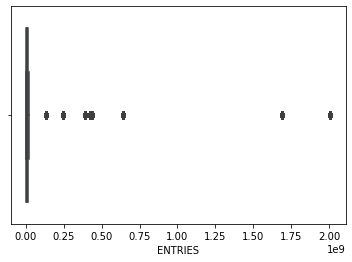

In [50]:
# CHECKING FOR OUTLIERS FOR 125ST AS A SAMPLE (ONE OF THE CRIME HEAVY STATIONS)
SAMPLESTATION=MTA_data_2018[MTA_data_2018['STATION']=='125 ST']
sns.boxplot(SAMPLESTATION['ENTRIES'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of entries'}, xlabel='ENTRIES', ylabel='Density'>

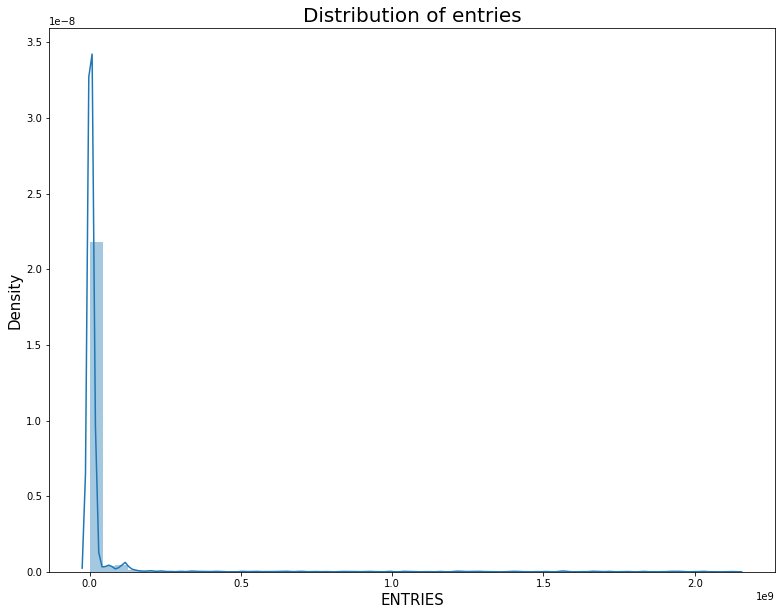

<Figure size 432x288 with 0 Axes>

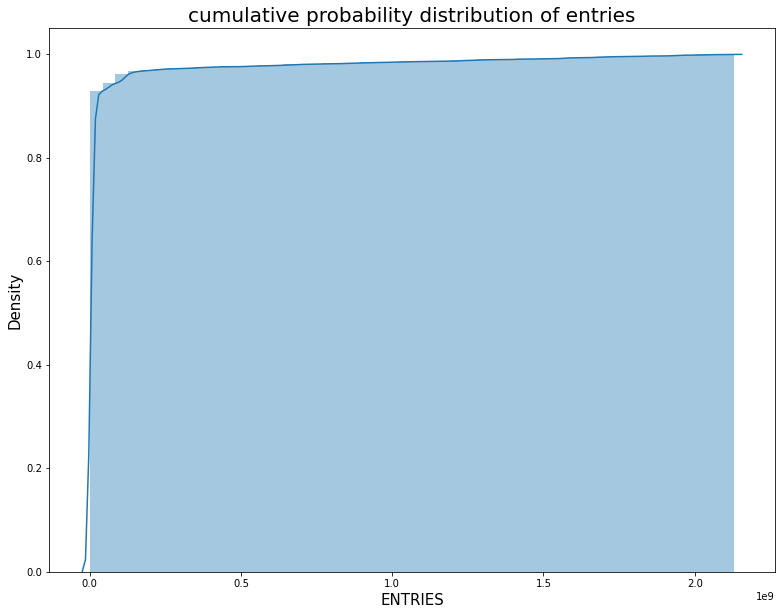

In [56]:
#PLOTTING THE DISTRIBUTION OF ENTRIES WITH THE OUTLIERS
plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(MTA_data_2018.ENTRIES)
plt.savefig('graph000.png')

plt.figure()

plt.figure(figsize=(13,10))
plt.title("cumulative probability distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(MTA_data_2018.ENTRIES,hist_kws={"cumulative":True},kde_kws={"cumulative":True})


In [57]:
# OUTLIERS
q3 = MTA_data_2018.ENTRIES.quantile(q=0.75)
q1 = MTA_data_2018.ENTRIES.quantile(q=0.25)
IQR = q3 -  q1
OUTLIER = q3 + 1.5 * IQR
OUTLIER

16550368.25

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

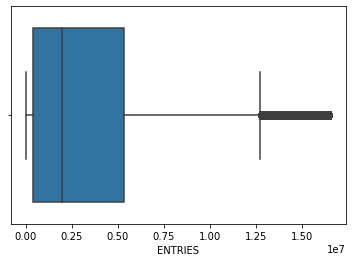

In [58]:
#PLOTTING THE BOX PLOT EXCLUDING THE OUTLIERS
sns.boxplot( MTA_data_2018[MTA_data_2018.ENTRIES<=OUTLIER].ENTRIES)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of entries'}, xlabel='ENTRIES', ylabel='Density'>

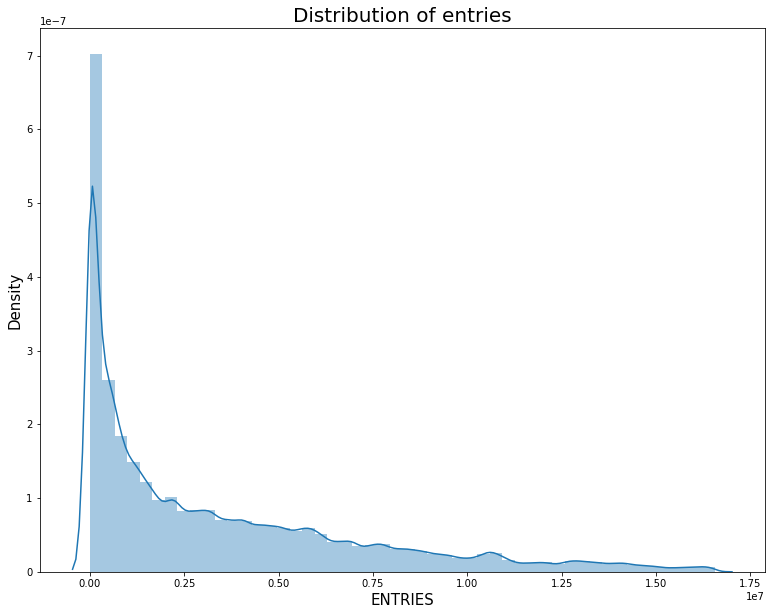

<Figure size 432x288 with 0 Axes>

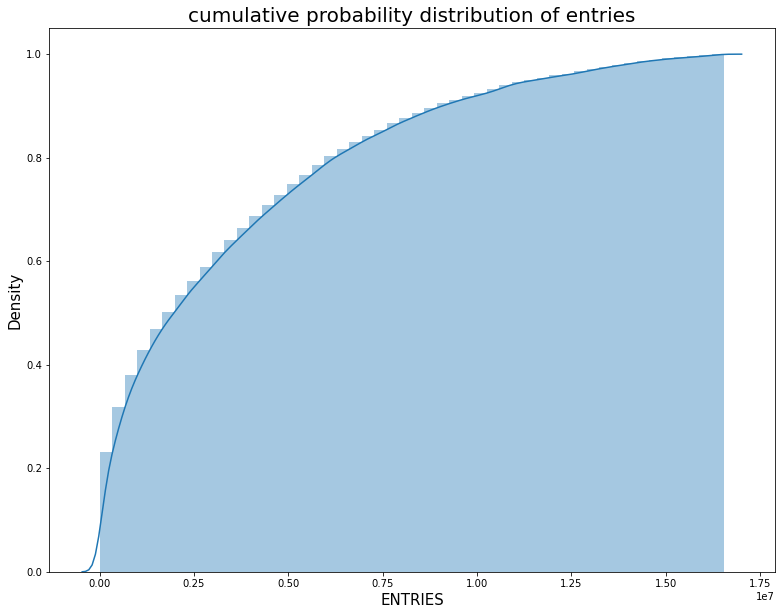

In [59]:
#PLOTTING THE DISTRIBUTION OF ENTRIES WITHOUT THE OUTLIERS
plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(MTA_data_2018.ENTRIES[MTA_data_2018.ENTRIES<=OUTLIER])
plt.savefig('graph0001.png')
plt.figure()

plt.figure(figsize=(13,10))
plt.title("cumulative probability distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(MTA_data_2018.ENTRIES[MTA_data_2018.ENTRIES<=OUTLIER],hist_kws={"cumulative":True},kde_kws={"cumulative":True})


In [60]:
#REMOVING THE OUTLIERS
MTA_data_2018 = MTA_data_2018[(MTA_data_2018.ENTRIES<=OUTLIER)]

In [61]:
MTA_data_2018.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE
9855431,A002,R051,02-00-00,59 ST,01/01/2018,23:00:00,6464907,2018-01-01 23:00:00,A002-R051-02-00-00-59 ST
9850756,A002,R051,02-00-00,59 ST,01/01/2018,19:00:00,6464806,2018-01-01 19:00:00,A002-R051-02-00-00-59 ST
9846063,A002,R051,02-00-00,59 ST,01/01/2018,15:00:00,6464623,2018-01-01 15:00:00,A002-R051-02-00-00-59 ST
9841353,A002,R051,02-00-00,59 ST,01/01/2018,11:00:00,6464517,2018-01-01 11:00:00,A002-R051-02-00-00-59 ST
9836613,A002,R051,02-00-00,59 ST,01/01/2018,07:00:00,6464491,2018-01-01 07:00:00,A002-R051-02-00-00-59 ST


### AGGREGATION
To solve certain issues with both datasets group by will be used

In [66]:
#EXPLORING DATA
MTA_data_2018.describe()

,ENTRIES
count,8.928534e+06
mean,3.396062e+06
std,3.768148e+06
min,0.000000e+00
25%,4.049240e+05
50%,1.968380e+06
75%,5.332371e+06
max,1.655035e+07


In [67]:
#EXPLORING DATA
ARRESTASSIGNED.describe()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,name,notes
count,195888,195888,195888,195888,195888,195888,195888
unique,3148,4,5,2,7,350,103
top,2013-01-10,M,18-24,M,BLACK,42nd St - Port Authority Bus Term,L-all times
freq,216,74163,75595,173968,110312,8466,13700


In [62]:
# STORING THE TURNSTILES WITH THE MOST ENTRIES IN EACH STATION DESCENDINGLY (CUMMULATIVE)
TURNSTILE_DAILY = (MTA_data_2018
                        .groupby(['TURNSTILE', "DATE",'STATION'],as_index=False)
                        .ENTRIES.first())

In [63]:
# SPLITTING THE GROUP BY TO LATER ON FILTER ON SCP
TURNSTILE_DAILY_NOSCP = (MTA_data_2018
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [64]:
TURNSTILE_DAILY_NOSCP.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2018,6464907
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180


In [65]:
TURNSTILE_DAILY.head()

,TURNSTILE,DATE,STATION,ENTRIES
0,A002-R051-02-00-00-59 ST,01/01/2018,59 ST,6464907
1,A002-R051-02-00-00-59 ST,01/02/2018,59 ST,6466375
2,A002-R051-02-00-00-59 ST,01/03/2018,59 ST,6467957
3,A002-R051-02-00-00-59 ST,01/04/2018,59 ST,6468797
4,A002-R051-02-00-00-59 ST,01/05/2018,59 ST,6470180


In [68]:
#CALCULATING PREV DATE AND PREV ENTRIES TO SOLVE THE CUMMLATIVE PROBLEM 
TURNSTILE_DAILY_NOSCP[["PREV_DATE", "PREV_ENTRIES"]] = (TURNSTILE_DAILY_NOSCP
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-68-5f4de86da182>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TURNSTILE_DAILY_NOSCP[["PREV_DATE", "PREV_ENTRIES"]] = (TURNSTILE_DAILY_NOSCP


In [69]:
TURNSTILE_DAILY_NOSCP.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2018,6464907,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375,01/01/2018,6464907.0
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957,01/02/2018,6466375.0
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797,01/03/2018,6467957.0
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180,01/04/2018,6468797.0


In [70]:
# DROPPING THE FIRST ROW THAT CONTAINS NULL
TURNSTILE_DAILY_NOSCP.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [71]:
TURNSTILE_DAILY_NOSCP.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375,01/01/2018,6464907.0
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957,01/02/2018,6466375.0
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797,01/03/2018,6467957.0
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180,01/04/2018,6468797.0
5,A002,R051,02-00-00,59 ST,01/06/2018,6470809,01/05/2018,6470180.0


In [72]:
#COUNTING BACKWARDS. SOLVE IT BEFORE MAKING THE DAILY COUNT COLUMN
TURNSTILE_DAILY_NOSCP[TURNSTILE_DAILY_NOSCP["ENTRIES"] < TURNSTILE_DAILY_NOSCP["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
330,A002,R051,02-00-00,59 ST,12/23/2017,6456484,12/22/2018,6882787.0
332,A002,R051,02-00-00,59 ST,12/24/2017,6457068,12/23/2018,6883438.0
334,A002,R051,02-00-00,59 ST,12/25/2017,6457304,12/24/2018,6884382.0
336,A002,R051,02-00-00,59 ST,12/26/2017,6458617,12/25/2018,6884618.0
338,A002,R051,02-00-00,59 ST,12/27/2017,6460108,12/26/2018,6886015.0


In [74]:
# HOW MANY TIMES THIS PROBLEM HAVE OCCURED
(TURNSTILE_DAILY_NOSCP[TURNSTILE_DAILY_NOSCP["ENTRIES"] < TURNSTILE_DAILY_NOSCP["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .count()).head()

DATE  ENTRIES  PREV_DATE  PREV_ENTRIES
C/A  UNIT SCP      STATION                                        
A002 R051 02-00-00 59 ST       7        7          7             7
          02-00-01 59 ST       7        7          7             7
          02-03-00 59 ST       7        7          7             7
          02-03-01 59 ST       7        7          7             7
          02-03-02 59 ST       7        7          7             7

In [75]:
#CALCULATING DAILY ENTRIES WHILE SOLVING THE ENTRIES PROBLEMS LIKE COUNTING BACKWARDS, RESTETTING BECAUSE OF 
#BIG VALUES
def GETDAILYENTREYCOUNT(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        
        counter = -counter
    if counter > max_counter:
       
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
       
        return 0
    return counter

TURNSTILE_DAILY_NOSCP["DAILY_ENTRIES"] = TURNSTILE_DAILY_NOSCP.apply(GETDAILYENTREYCOUNT, axis=1, max_counter=50000)

In [76]:
TURNSTILE_DAILY_NOSCP.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375,01/01/2018,6464907.0,1468.0
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957,01/02/2018,6466375.0,1582.0
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797,01/03/2018,6467957.0,840.0
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180,01/04/2018,6468797.0,1383.0
5,A002,R051,02-00-00,59 ST,01/06/2018,6470809,01/05/2018,6470180.0,629.0


In [77]:
# SOME C/A, UNIT AND STATIONS HAVE A SINGLE TURNSTILE SO FAR WE HAVE BEEN OPERATING ON EACH TURNSTILE UNIQUELY
# NOW WE ARE GONNA FILTER ON SCP TO FIND OUT MULTIPLE TURNSTILES IN ONE AREA/STATION
CAUNITSTATION_DAILY = TURNSTILE_DAILY_NOSCP.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
CAUNITSTATION_DAILY.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,01/02/2018,12592.0
1,A002,R051,59 ST,01/03/2018,13661.0
2,A002,R051,59 ST,01/04/2018,8490.0
3,A002,R051,59 ST,01/05/2018,12158.0
4,A002,R051,59 ST,01/06/2018,6993.0


In [78]:
#CALCULATE THE NUMBER OF ENTRIES FOR EACH STATION
STATION_DAILY = TURNSTILE_DAILY_NOSCP.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
STATION_DAILY.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/02/2018,8182.0
1,1 AV,01/03/2018,9294.0
2,1 AV,01/04/2018,5273.0
3,1 AV,01/05/2018,9282.0
4,1 AV,01/06/2018,5825.0


In [79]:
#CALCULATING THE NUMBER OF ENTRIES THROUGHOUT THE WHOLE TIME PERIOD (CALCULATING THE TRAFFIC)
STATION_TOTALS = STATION_DAILY.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

STATION_TOTALS.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,48202266.0
1,GRD CNTRL-42 ST,37224737.0
2,FULTON ST,29817826.0
3,23 ST,29772677.0
4,PATH NEW WTC,29056032.0


In [80]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
DAILY_STATION_42_STPORTAUTH = STATION_DAILY[STATION_DAILY['STATION'] == '42 ST-PORT AUTH']
DAILY_STATION_42_STPORTAUTH.head()

,STATION,DATE,DAILY_ENTRIES
22870,42 ST-PORT AUTH,01/02/2018,58183.0
22871,42 ST-PORT AUTH,01/03/2018,63204.0
22872,42 ST-PORT AUTH,01/04/2018,38062.0
22873,42 ST-PORT AUTH,01/05/2018,55448.0
22874,42 ST-PORT AUTH,01/06/2018,36261.0


In [81]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
ST_125 = STATION_DAILY[STATION_DAILY['STATION'] == '125 ST']
ST_125.head()

,STATION,DATE,DAILY_ENTRIES
3136,125 ST,01/02/2018,48243.0
3137,125 ST,01/03/2018,53328.0
3138,125 ST,01/04/2018,27627.0
3139,125 ST,01/05/2018,47703.0
3140,125 ST,01/06/2018,28083.0


In [82]:
STUPHIN_ARCHER = STATION_DAILY[STATION_DAILY['STATION'] == 'SUTPHIN-ARCHER']
STUPHIN_ARCHER.head()

,STATION,DATE,DAILY_ENTRIES
119794,SUTPHIN-ARCHER,01/02/2018,19623.0
119795,SUTPHIN-ARCHER,01/03/2018,20827.0
119796,SUTPHIN-ARCHER,01/04/2018,11228.0
119797,SUTPHIN-ARCHER,01/05/2018,18269.0
119798,SUTPHIN-ARCHER,01/06/2018,10481.0


In [83]:
JAY_ST = STATION_DAILY[STATION_DAILY['STATION'] == 'JAY ST-METROTEC']
JAY_ST.head()

,STATION,DATE,DAILY_ENTRIES
87466,JAY ST-METROTEC,01/02/2018,31662.0
87467,JAY ST-METROTEC,01/03/2018,34861.0
87468,JAY ST-METROTEC,01/04/2018,16910.0
87469,JAY ST-METROTEC,01/05/2018,29956.0
87470,JAY ST-METROTEC,01/06/2018,13021.0


In [84]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
DAILY_STATION_CONEY_ISLAND = STATION_DAILY[STATION_DAILY['STATION'] == 'CONEY IS-STILLW']
DAILY_STATION_CONEY_ISLAND.head()

,STATION,DATE,DAILY_ENTRIES
65138,CONEY IS-STILLW,01/02/2018,9630.0
65139,CONEY IS-STILLW,01/03/2018,10416.0
65140,CONEY IS-STILLW,01/04/2018,5133.0
65141,CONEY IS-STILLW,01/05/2018,8365.0
65142,CONEY IS-STILLW,01/06/2018,5258.0


In [85]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
#THE FIRST QUARTILE OF THE YEAR FROM JAN-EARLY APRIL
ST_125_Q1 = STATION_DAILY[STATION_DAILY['STATION'] == '125 ST'].head(91)
ST_125_Q1.tail()

,STATION,DATE,DAILY_ENTRIES
3222,125 ST,04/05/2018,55069.0
3223,125 ST,04/06/2018,55695.0
3224,125 ST,04/07/2018,38233.0
3225,125 ST,04/08/2018,32738.0
3226,125 ST,04/09/2018,57443.0


In [86]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
#THE FIRST QUARTILE OF THE YEAR FROM JAN-EARLY APRIL
STUPHIN_ARCHER_Q1 = STATION_DAILY[STATION_DAILY['STATION'] == 'SUTPHIN-ARCHER'].head(91)
STUPHIN_ARCHER_Q1.tail()

,STATION,DATE,DAILY_ENTRIES
119880,SUTPHIN-ARCHER,04/05/2018,20514.0
119881,SUTPHIN-ARCHER,04/06/2018,19596.0
119882,SUTPHIN-ARCHER,04/07/2018,11698.0
119883,SUTPHIN-ARCHER,04/08/2018,9398.0
119884,SUTPHIN-ARCHER,04/09/2018,21290.0


In [87]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
#THE FIRST QUARTILE OF THE YEAR FROM JAN-EARLY APRIL
JAY_ST_Q1 = STATION_DAILY[STATION_DAILY['STATION'] == 'JAY ST-METROTEC'].head(91)
JAY_ST_Q1.tail()

,STATION,DATE,DAILY_ENTRIES
87552,JAY ST-METROTEC,04/05/2018,38961.0
87553,JAY ST-METROTEC,04/06/2018,35767.0
87554,JAY ST-METROTEC,04/07/2018,18233.0
87555,JAY ST-METROTEC,04/08/2018,14453.0
87556,JAY ST-METROTEC,04/09/2018,40838.0


In [88]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
#THE FIRST QUARTILE OF THE YEAR FROM JAN-EARLY APRIL
DAILY_STATION_CONEY_ISLAND_Q1 = STATION_DAILY[STATION_DAILY['STATION'] == 'CONEY IS-STILLW'].head(91)
DAILY_STATION_CONEY_ISLAND_Q1.tail()

,STATION,DATE,DAILY_ENTRIES
65224,CONEY IS-STILLW,04/05/2018,12089.0
65225,CONEY IS-STILLW,04/06/2018,10604.0
65226,CONEY IS-STILLW,04/07/2018,8445.0
65227,CONEY IS-STILLW,04/08/2018,7656.0
65228,CONEY IS-STILLW,04/09/2018,11291.0


In [89]:
#PREPRATION FOR PLOTTING OF THE HIGHEST STATION WHERE THE HIGHEST CRIME HAVE BEEN RECORDED (DAILY ENTRIES)
#THE FIRST QUARTILE OF THE YEAR FROM JAN-EARLY APRIL
DAILY_STATION_42_STPORTAUTH_Q1 = STATION_DAILY[STATION_DAILY['STATION'] == '42 ST-PORT AUTH'].head(91)
DAILY_STATION_42_STPORTAUTH_Q1.tail()

,STATION,DATE,DAILY_ENTRIES
22956,42 ST-PORT AUTH,04/05/2018,67060.0
22957,42 ST-PORT AUTH,04/06/2018,64984.0
22958,42 ST-PORT AUTH,04/07/2018,47857.0
22959,42 ST-PORT AUTH,04/08/2018,40092.0
22960,42 ST-PORT AUTH,04/09/2018,60661.0


## ARREST DATASET PREPRATION

In [106]:
#SPICIFYING THE CRIMES HAPPENING IN 2018 & RENAING COLUMNS
ARRESTASSIGNED = ARRESTASSIGNED[ARRESTASSIGNED['ARREST_DATE'] >= '2018-01-01']
ARRESTASSIGNED.rename(columns={'name':'STATION'}, inplace=True)
ARRESTASSIGNED.head()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes
262345,2018-12-28,M,25-44,M,WHITE HISPANIC,Union Sq - 14th St,L-all times
262346,2018-12-28,K,25-44,M,WHITE,86th St,R-all times
262347,2018-12-28,B,45-64,M,BLACK,Brook Ave,6-all times
262348,2018-12-28,Q,45-64,F,BLACK,Sutphin Blvd - Archer Av,"E,J-all times, Z-rush hours AM westbound, PM e..."
262349,2018-12-28,Q,25-44,M,UNKNOWN,Sutphin Blvd - Archer Av,"E,J-all times, Z-rush hours AM westbound, PM e..."


In [107]:
def renaming_stations(name):
    
    if name=='42nd St - Port Authority Bus Term':
        return '42 ST-PORT AUTH'
    
    elif name=='Coney Island - Stillwell Av': 
        return 'CONEY IS-STILLW'
    
    elif name=='125th St': 
        return '125 ST'
    
    elif name=='Sutphin Blvd - Archer Av': 
        return 'SUTPHIN-ARCHER'
    
    elif name=='Jay St - MetroTech': 
        return 'JAY ST-METROTEC'
    
    elif name=='Times Sq - 42nd St': 
        return 'TIMES SQ-42 ST'
    
    elif name=='3rd Ave - 149th St': 
        return '3 AV-149 ST'
    
    elif name=='Jamaica Ctr - Parsons / Archer': 
        return 'JAMAICA CENTER'
    
    elif name=='Nostrand Ave': 
        return 'NOSTRAND AV'
    
    elif name=='Sutter Ave': 
        return 'SUTTER AV-RUTLD'
    
    elif name=='3rd Ave - 138th St': 
        return '3 AV 138 ST'
    
    elif name=='116th St': 
        return '116 ST'
    
    elif name=='Utica Ave': 
        return 'UTICA AV'
    
    elif name=='34th St - Penn Station': 
        return '34 ST-PENN STA'
    
    elif name=='Crown Hts - Utica Ave': 
        return 'CROWN HTS-UTICA'
    
    elif name=='Fordham Rd': 
        return 'FORDHAM RD'
    
    elif name=='86th St': 
        return '86 ST'
    
    elif name=='59th St': 
        return '59 ST'
    
    elif name=='33rd St': 
        return '33 ST'
    
    elif name=='Nevins St': 
        return 'NEVINS ST'
    
    elif name=='Kingsbridge Rd': 
        return 'KINGSBRIDGE RD'
    
    elif name=='Prospect Ave': 
        return 'PROSPECT AV'
    
    elif name=='Hoyt - Schermerhorn Sts': 
        return 'HOYT-SCHER'
    
    elif name=='Tremont Ave': 
        return 'TREMONT AV'
    
    elif name=='Lexington Ave - 59th St': 
        return 'LEXINGTON AV/53'
    
    elif name=='23rd St': 
        return '23 ST'
    
    elif name=='50th St': 
        return '50 ST'
    
    elif name=='96th S': 
        return '96 ST'
    
    elif name=='E 180th St': 
        return 'E 180 ST'
    
    elif name=='174th St': 
        return '174 ST'
    
    elif name=='Borough Hall': 
        return 'BOROUGH HALL'
    
    elif name=='Herald Sq - 34th St': 
        return '34 ST-HERALD SQ'
    
    elif name=='170th St': 
        return '170 ST'
    
    elif name=="Atlantic Av - Barclay's Center": 
        return 'ATLANTIC AV'
    
    elif name=="28th St": 
        return '28 ST'
    
    elif name=="Simpson St": 
        return 'SIMPSON ST'
    
    elif name=="59th St - Columbus Circle": 
        return '59 ST COLUMBUS'
    
    elif name=="Myrtle - Wyckoff Aves": 
        return 'MYRTLE-WYCKOFF'
    
    elif name=="Mt Eden Ave": 
        return 'MT EDEN AV'
    
    elif name=="Freeman St": 
        return 'FREEMAN ST'
    
    elif name=="Rockaway Ave": 
        return 'ROCKAWAY AV'
    
    elif name=="Canarsie - Rockaway Pkwy": 
        return 'CANARSIE-ROCKAW'
    
    elif name=="Hunts Point Ave": 
        return 'HUNTS POINT AV'
    
    elif name=="Euclid Ave": 
        return 'EUCLID AV'
    
    elif name=="Kings Hwy": 
        return 'KINGS HWY'
    
    elif name=="Van Siclen Ave": 
        return 'VAN SICLEN AVE'
    
    elif name=="DeKalb Ave": 
        return 'DEKALB AV'
    
    elif name=="183rd St": 
        return '183 ST'
    
    elif name=="49th St": 
        return '49 ST'
    
    elif name=="145th St": 
        return '145 ST'
    
    elif name=="Burnside Ave": 
        return 'BURNSIDE AV'
    
    elif name=="Far Rockaway - Mott Ave": 
        return 'FAR ROCKAWAY'
    
    elif name=="Grand Central - 42nd St": 
        return 'GRD CNTRL-42 ST'
    
    elif name=="South Ferry": 
        return 'SOUTH FERRY'
    
    elif name=="169th St": 
        return '169 ST'
    
    elif name=="Wakefield - 241st St": 
        return 'WAKEFIELD/241'
    
    elif name=="Bleecker St": 
        return 'BLEECKER ST'
    
    elif name=="53rd St": 
        return '53 ST'
    
    elif name=="135th St": 
        return '135 ST'
    
    elif name=="176th St": 
        return '176 ST'
    
    elif name=="110th St": 
        return '110 ST'
    
    elif name=="Morrison Av - Soundview": 
        return 'MORISN AV/SNDVW'
    
    elif name=="Sutter Ave - Rutland Road": 
        return 'SUTTER AV-RUTLD'
    
    elif name=="Franklin Ave - Fulton St": 
        return 'FRANKLIN AV'
    
    elif name=="Halsey St": 
        return 'HALSEY ST'
    
    elif name=="Sheepshead Bay": 
        return 'SHEEPSHEAD BAY'
    
    elif name=="219th St": 
        return '219 ST'
    
    elif name=="W 4th St - Washington Sq (Upper)": 
        return 'W 4 ST-WASH SQ'
    
    elif name=="Bergen St": 
        return 'BERGEN ST'
    
    elif name=="Beach 60th St": 
        return 'BEACH 60 ST'
    
    elif name=="West Farms Sq - E Tremont Av": 
        return 'WEST FARMS SQ'
    
    elif name=="Morgan Ave": 
        return 'MORGAN AV'
    
    elif name=="Grand Ave - Newtown": 
        return 'GRAND-NEWTOWN'
    
    elif name=="42nd St - Bryant Pk": 
        return '42 ST-BRYANT PK'
    
    elif name=="Church Ave": 
        return 'CHURCH AV'
    
    elif name=="Jackson Hts - Roosevelt Av": 
        return 'JKSN HT-ROOSVLT'
    
    elif name=="168th St": 
        return '168 ST'
    
    elif name=="Beach 67th St": 
        return 'BEACH 67 ST'
    
    elif name=="Flushing - Main St": 
        return 'FLUSHING-MAIN'
    
    elif name=="Bay 50th St": 
        return 'BAY 50 ST'
    
    elif name=="103rd St": 
        return '103 ST'
    
    elif name=="174th-175th Sts": 
        return '174-175 STS'
    
    elif name=="182nd-183rd Sts": 
        return '182-183 STS'
    
    elif name=="Livonia Ave": 
        return 'LIVONIA AV'
    
    elif name=="Kosciuszko St": 
        return 'KOSCIUSZKO ST'
    
    elif name=="8th Ave": 
        return '8 AV'
    
    elif name=="Allerton Ave": 
        return 'ALLERTON AV'
    
    elif name=="Saratoga Ave":
        return 'SARATOGA AV '
    
    elif name=="Fulton St": 
        return 'FULTON ST'
    
    elif name=="45th St": 
        return '45 ST'
    
    elif name=="Franklin Ave": 
        return 'FRANKLIN AV'
    
    elif name=="Bedford - Nostrand Aves": 
        return 'BEDFORD-NOSTRAN'
    
    elif name=="Brook Ave": 
        return 'BROOK AV'
    
    elif name=="Prospect Park": 
        return 'PROSPECT PAR' 
    
    elif name=="36th St": 
        return '36 ST' 
    
    elif name=="Newkirk Ave": 
        return 'NEWKIRK AV' 
    
    elif name=="Ralph Ave": 
        return 'RALPH AV' 
    
    elif name=="Broadway Junction": 
        return 'BROADWAY JCT' 
    
    elif name=="Central Park North (110th St)": 
        return 'CENTRAL PK N110' 
    
    elif name=="Cypress Ave": 
        return 'CYPRESS AV' 
    
    elif name=="Flushing Ave": 
        return 'FLUSHING AV' 
    
    elif name=="Ave J": 
        return 'AVENUE J' 
    
    elif name=="Marcy Ave": 
        return 'MARCY AV' 
    
    elif name=="E 149th St": 
        return 'E 149 ST' 
    
    elif name=="Norwood - 205th St": 
        return 'NORWOOD 205 ST' 
    
    elif name=="Lower East Side - 2nd Ave": 
        return '2 AV' 
    
    elif name=="149th St - Grand Concourse": 
        return '149/GRAND CONC' 
    
    elif name=="Beach 25th St": 
        return 'BEACH 25 ST' 
    
    elif name=="Winthrop St": 
        return 'WINTHROP ST' 
    
    elif name=="Kingston - Throop Aves": 
        return 'KINGSTON-THROOP' 
    
    elif name=="Gates Ave": 
        return 'GATES AV' 
    
    elif name=="Ozone Park - Lefferts Blvd": 
        return 'OZONE PK LEFFRT' 
    
    elif name=="Bay Pky": 
        return 'BAY PKWY' 
    
    elif name=="Bedford Ave": 
        return 'BEDFORD AV' 
    
    elif name=="Union Sq - 14th St": 
        return 'UNION ST' 
    
    elif name=="Elder Ave": 
        return 'ELDER AV' 
    
    elif name=="Woodhaven Blvd - Queens Mall": 
        return 'WOODHAVEN BLVD'
    
    elif name=="Whitehall St": 
        return 'WHITEHALL S-FRY' 
    
    elif name=="Gun Hill Rd": 
        return 'GUN HILL RD'
    
    elif name=="Montrose Ave": 
        return 'MONTROSE AV'
    
    elif name=="Brighton Beach": 
        return 'BRIGHTON BEACH'
    
    elif name=="14th St": 
        return '14TH STREET'
    
    elif name=="Beach 44th St": 
        return 'BEACH 44 ST'
    
    elif name=="72nd St": 
        return '72 ST'
    
    elif name=="W 8th St - NY Aquarium": 
        return 'W 8 ST-AQUARIUM'
    
    elif name=="Cathedral Pkwy (110th St)": 
        return 'CATHEDRAL PKWY'
    
    elif name=="Myrtle-Willoughby Aves": 
        return 'MYRTLE-WILLOUGH'
    
    elif name=="Jamaica - 179th St": 
        return 'JAMAICA 179 ST'
    
    elif name=="Brooklyn College - Flatbush Ave": 
        return 'FLATBUSH AV-B.C'
    
    elif name=="Myrtle Ave": 
        return 'MYRTLE AV'
    
    elif name=="East Broadway": 
        return 'EAST BROADWAY'
    
    elif name=="Dyckman St": 
        return 'DYCKMAN ST'
    
    elif name=="Smith - 9th Sts": 
        return 'SMITH-9 ST'
    
    elif name=="Woodlawn": 
        return 'WOODLAWN'
    
    elif name=="New Lots Ave": 
        return 'NEW LOTS AV'
    
    elif name=="Grant Ave": 
        return 'GRANT AV'
    
    elif name=="157th St": 
        return '157 ST'
    
    elif name=="57th St": 
        return '57 ST'
    
    elif name=="6th Ave": 
        return '6 AV'
    
    elif name=="82nd St - Jackson Hts": 
        return '82 ST-JACKSON H'
    
    elif name=="Castle Hill Ave": 
        return 'CASTLE HILL AV'
    
    elif name=="Ave M": 
        return 'AVENUE M'
    
    elif name=="Franklin St": 
        return 'FRANKLIN ST'
    
    elif name=="207th St": 
        return '207 ST'
    
    elif name=="Canal St": 
        return 'CANAL ST'
    
    elif name=="Kew Gardens - Union Tpke": 
        return 'KEW GARDENS'
    
    elif name=="181st St": 
        return '181 ST'
    
    elif name=="74th St - Broadway": 
        return '74 ST-BROADWAY'
    
    elif name=="Clinton - Washington Aves": 
        return 'CLINTON-WASH AV'
    
    elif name=="79th St": 
        return '79 ST'
    
    elif name=="25th Ave": 
        return '25 AV'
    
    elif name=="St Lawrence Ave": 
        return 'ST LAWRENCE AV'
    
    elif name=="Delancey St - Essex St": 
        return 'DELANCEY/ESSEX'
    
    elif name=="90th St - Elmhurst Av": 
        return '90 ST-ELMHURST'
    
    elif name=="Grand St": 
        return 'GRAND ST'
    
    elif name=="138th St - Grand Concourse": 
        return '138/GRAND CONC'
    
    elif name=="Rockaway Blvd": 
        return 'ROCKAWAY BLVD'
    
    elif name=="Atlantic Ave": 
        return 'ATLANTIC AV'
    
    elif name=="4th Av - 9th St": 
        return '4 AV-9 ST'
    
    elif name=="Queens Plz": 
        return 'QUEENS PLAZA'
    
    elif name=="Lorimer St": 
        return 'LORIMER ST'
    
    elif name=="Ft Hamilton Pkwy": 
        return 'FT HAMILTON PKY'
    
    elif name=="Mosholu Pkwy": 
        return 'MOSHOLU PKWY'
    
    elif name=="Ave U": 
        return 'AVENUE U'
    
    elif name=="66th St - Lincoln Ctr": 
        return '66 ST-LINCOLN'
    
    elif name=="18th Ave": 
        return '18 AV'
    
    elif name=="Burke Ave": 
        return 'BURKE AV'
    
    elif name=="Whitlock Ave": 
        return 'WHITLOCK AV'
    
    elif name=="Brooklyn Bridge - City Hall": 
        return 'BROOKLYN BRIDGE'
    
    elif name=="Junius St": 
        return 'JUNIUS ST'
    
    elif name=="77th St": 
        return '77 ST'
    
    elif name=="51st St": 
        return '51 ST'
    
    elif name=="Chambers St": 
        return 'CHAMBERS ST'
    
    elif name=="Bronx Park East": 
        return 'BRONX PARK EAST'
    
    elif name=="7th Ave": 
        return '7 AV'
    
    elif name=="Forest Hills - 71st A": 
        return 'FOREST HILLS 71'
    
    elif name=="Ocean Pkwy": 
        return 'OCEAN PKWY'
    
    elif name=="Briarwood - Van Wyck Blvd": 
        return 'BRIARWOOD'
    
    elif name=="80th St": 
        return '80 ST'
    
    elif name=="47th-50th Sts - Rockefeller Ctr": 
        return '47-50 STS ROCK'
    
    elif name=="Jackson Ave": 
        return 'ASTORIA BLV'
    
    elif name=="Graham Ave": 
        return 'GRAHAM AV'
    
    elif name=="Woodside - 61st St": 
        return '61 ST WOODSIDE'
    
    elif name=="25th St": 
        return '25 ST'
    
    elif name=="Intervale Ave": 
        return 'INTERVALE AV'
    
    elif name=="Pennsylvania Ave": 
        return 'PENNSYLVANIA AV'
    
    elif name=="Prince St": 
        return 'PRINCE ST'
    
    elif name=="Crescent St": 
        return 'CRESCENT ST'
    
    elif name=="Beach 90th St": 
        return 'BEACH 90 ST'
    
    elif name=="137th St - City College": 
        return '137 ST CITY COL'
    
    elif name=="Parkside Ave": 
        return 'PARKSIDE AV'
    
    elif name=="Alabama Ave": 
        return 'ALABAMA AV'
    
    elif name=="Hoyt St": 
        return 'HOYT ST'
    
    elif name=="Beverly Rd": 
        return 'BEVERLY RD'
    
    elif name=="Parsons Blvd": 
        return 'PARSONS BLVD'
    
    elif name=="68th St - Hunter College": 
        return '68ST-HUNTER CO'
    
    elif name=="Jefferson St": 
        return 'JEFFERSON ST'
    
    elif name=="Eastchester - Dyre Ave": 
        return 'EASTCHSTER/DYRE'
    
    elif name=="Woodhaven Blvd": 
        return 'WOODHAVEN BLVD'
    
    elif name=="103rd St - Corona Plaza": 
        return '103 ST-CORONA'
    
    elif name=="63rd Dr - Rego Park": 
        return '63 DR-REGO PARK'
    
    elif name=="Longwood Ave": 
        return 'LONGWOOD AV'
    
    elif name=="Inwood - 207th St": 
        return 'INWOOD-207 ST'
    
    elif name=="Broadway": 
        return 'BROADWAY'
    
    elif name=="ereid Ave (238 St)": 
        return 'NEREID AV'
    
    elif name=="20th Ave": 
        return '20 AV'
    
    elif name=="Broad St": 
        return 'BROAD ST'
    
    elif name=="Wilson Ave": 
        return 'WILSON AV'
    
    elif name=="York St": 
        return 'YORK ST'
    
    elif name=="Broadway - Lafayette St": 
        return 'LAFAYETTE AV'
    
    elif name=="E 143rd St - St Mary's St": 
        return "E 143/ST MARY'S"
    
    elif name=="Kingston Ave": 
        return "KINGSTON AV"
    
    elif name=="Bowling Green": 
        return "BOWLING GREEN"
    
    elif name=="104th St": 
        return "104 ST"
    
    elif name=="Spring St": 
        return "SPRING ST"
    
    elif name=="Canal St - Holland Tunnel": 
        return "CANAL ST"
    
    elif name=="Junction Blvd": 
        return "JUNCTION BLVD"
    
    elif name=="Eastern Pkwy - Bklyn Museum": 
        return "EASTN PKWY-MUSM"
    
    elif name=="Westchester Sq - E Tremont Ave": 
        return "WESTCHESTER SQ"
    
    elif name=="Steinway St": 
        return "STEINWAY ST"
    
    elif name=="Queensboro Plz": 
        return "QUEENSBORO PLZ"
    
    elif name=="Long Island City - Court Sq": 
        return "COURT SQ"
    
    elif name=="Ave H": 
        return "AVENUE H"
    
    elif name=="18th St": 
        return "18 ST"
    
    elif name=="Bowery": 
        return "BOWERY"
    
    elif name=="Parkchester": 
        return "PARKCHESTER"
    
    elif name=="Cortlandt St": 
        return "CORTLANDT ST"
    
    elif name=="Sutphin Blvd": 
        return "SUTPHIN BLVD"
    
    elif name=="Bay Ridge Ave": 
        return "BAY RIDGE AV"
    
    elif name=="Sterling St": 
        return "STERLING ST"
    
    elif name=="175th St": 
        return "175 ST"
    
    elif name=="Vernon Blvd - Jackson Ave": 
        return "VERNON-JACKSON"
    
    elif name=="High St": 
        return "HIGH ST"
    
    elif name=="88th St": 
        return "88 ST"
    
    elif name=="E 105th St": 
        return "EAST 105 ST"
    
    elif name=="Park Pl": 
        return "PARK PLACE"
    
    elif name=="Astor Pl": 
        return "ASTOR PL"
    
    elif name=="Nassau Ave": 
        return "NASSAU AV"
    
    elif name=="Gravesend - 86th St": 
        return "86 ST"
    
    elif name=="Houston St": 
        return "HOUSTON ST"
    
    elif name=="52nd St": 
        return "52 ST"
    
    elif name=="W 4th St - Washington Sq (Lower)": 
        return "W 4 ST-WASH SQ"
    
    elif name=="Botanic Garden": 
        return "BOTANIC GARDEN"
    
    elif name=="Rector St": 
        return "RECTOR ST"
    
    elif name=="36th Ave": 
        return "36 AV"
    
    elif name=="191st St": 
        return "191 ST"
    
    elif name=="155th St": 
        return "155 ST"
    
    elif name=="Astoria - Ditmars Blvd": 
        return "ASTORIA DITMARS"
    
    elif name=="Morris Park": 
        return "MORRIS PARK"
    
    elif name=="Knickerbocker Ave": 
        return "KNICKERBOCKER"
    
    elif name=="111th St": 
        return "111 ST"
    
    elif name=="Shepherd Ave": 
        return "SHEPHERD AV"
    
    elif name=="21st St - Queensbridge": 
        return "21 ST-QNSBRIDGE"
    
    elif name=="Norwood Ave": 
        return "NORWOOD 205 ST"
    
    elif name=="5th Ave - Bryant Pk": 
        return "5 AVE"
    
    elif name=="Pelham Bay Park": 
        return "PELHAM BAY PARK"
    
    elif name=="President St": 
        return "PRESIDENT ST"
    
    elif name=="Zerega Ave": 
        return "ZEREGA AV"
    
    elif name=="Aqueduct - North Conduit Av": 
        return "AQUEDUCT N.COND"
    
    elif name=="Pelham Pkwy": 
        return "PELHAM PKWY"
    
    elif name=="5th Ave - 53rd St": 
        return "5 AV/53 ST"
    
    elif name=="Christopher St - Sheridan Sq": 
        return "CHRISTOPHER ST"
    
    elif name=="Classon Ave": 
        return "CLASSON AV"
    
    elif name=="Cleveland St": 
        return "CLEVELAND ST"
    
    elif name=="Carroll St": 
        return "CARROLL ST"
    
    elif name=="Lafayette Ave": 
        return "LAFAYETTE AV"
    
    elif name=="Greenpoint Ave": 
        return "GREENPOINT AV"
    
    elif name=="Union St": 
        return "UNION ST"
    
    elif name=="67th Ave": 
        return "67 AV"
    
    elif name=="Bay Ridge - 95th St": 
        return "BAY RIDGE-95 ST"
    
    elif name=="Broad Channel": 
        return "BROAD CHANNEL"
    
    elif name=="Clark St": 
        return "CLARK ST"
    
    elif name=="62nd St": 
        return "65 ST"
    
    elif name=="190th St": 
        return "190 ST"
    
    else:
        return 'UNDFINED'

In [108]:
#DECLARING A MASK IN PREPRATION FOR MERGING
MASK1=ARRESTASSIGNED
MASK1['STATION']=ARRESTASSIGNED.STATION.apply(renaming_stations)
MASK1.head()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes
262345,2018-12-28,M,25-44,M,WHITE HISPANIC,UNION ST,L-all times
262346,2018-12-28,K,25-44,M,WHITE,86 ST,R-all times
262347,2018-12-28,B,45-64,M,BLACK,BROOK AV,6-all times
262348,2018-12-28,Q,45-64,F,BLACK,SUTPHIN-ARCHER,"E,J-all times, Z-rush hours AM westbound, PM e..."
262349,2018-12-28,Q,25-44,M,UNKNOWN,SUTPHIN-ARCHER,"E,J-all times, Z-rush hours AM westbound, PM e..."


In [109]:
#COUNTING EACH CRIME IN EACH STATION THROUGH VALUE COUNTS AND TRANSFORMING IT TO DATA FRAME
ARRESTASSIGNED_STATIONS=MASK1['STATION'].value_counts().to_frame().reset_index()
ARRESTASSIGNED_STATIONS.head()

,index,STATION
0,42 ST-PORT AUTH,237
1,CONEY IS-STILLW,183
2,125 ST,182
3,SUTPHIN-ARCHER,164
4,JAY ST-METROTEC,152


In [110]:
#RENAMING COLUMNS
ARRESTASSIGNED_STATIONS.rename(columns={'STATION': 'NO_OF_CRIMES','index':'STATION'}, inplace=True)
ARRESTASSIGNED_STATIONS.head()

,STATION,NO_OF_CRIMES
0,42 ST-PORT AUTH,237
1,CONEY IS-STILLW,183
2,125 ST,182
3,SUTPHIN-ARCHER,164
4,JAY ST-METROTEC,152


# MERGING DATASETS

In [111]:
MASK3=pd.merge(MASK1,ARRESTASSIGNED_STATIONS,on='STATION')
MASK3.head()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes,NO_OF_CRIMES
0,2018-12-28,M,25-44,M,WHITE HISPANIC,UNION ST,L-all times,15
1,2018-12-27,M,25-44,M,WHITE,UNION ST,L-all times,15
2,2018-10-27,M,25-44,M,WHITE HISPANIC,UNION ST,L-all times,15
3,2018-10-18,M,45-64,M,WHITE,UNION ST,"N,Q-all times, R-all times exc nights",15
4,2018-08-31,M,18-24,F,WHITE HISPANIC,UNION ST,L-all times,15


In [112]:
DF_CRIMES_IN_STATIONS=pd.merge(MASK3,STATION_TOTALS,on='STATION')
DF_CRIMES_IN_STATIONS.head()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes,NO_OF_CRIMES,DAILY_ENTRIES
0,2018-12-28,M,25-44,M,WHITE HISPANIC,UNION ST,L-all times,15,2082203.0
1,2018-12-27,M,25-44,M,WHITE,UNION ST,L-all times,15,2082203.0
2,2018-10-27,M,25-44,M,WHITE HISPANIC,UNION ST,L-all times,15,2082203.0
3,2018-10-18,M,45-64,M,WHITE,UNION ST,"N,Q-all times, R-all times exc nights",15,2082203.0
4,2018-08-31,M,18-24,F,WHITE HISPANIC,UNION ST,L-all times,15,2082203.0


# CORRELATION AND COVARIANCE

In [113]:
DF_STATIONS_CRIMES_SUBSET = DF_CRIMES_IN_STATIONS.loc[:, ['NO_OF_CRIMES','DAILY_ENTRIES']]

In [114]:
DF_STATIONS_CRIMES_SUBSET_COV = pd.DataFrame(np.cov(DF_STATIONS_CRIMES_SUBSET.T))
DF_STATIONS_CRIMES_SUBSET_COV.columns = ['NO_OF_CRIMES','DAILY_ENTRIES']
DF_STATIONS_CRIMES_SUBSET_COV.index = ['NO_OF_CRIMES','DAILY_ENTRIES']
DF_STATIONS_CRIMES_SUBSET_COV

,NO_OF_CRIMES,DAILY_ENTRIES
NO_OF_CRIMES,3.911808e+03,2.116073e+08
DAILY_ENTRIES,2.116073e+08,7.564115e+13


In [115]:
DF_STATIONS_CRIMES_SUBSET.var(axis = 0)

NO_OF_CRIMES     3.911808e+03
DAILY_ENTRIES    7.564115e+13
dtype: float64

In [116]:
DF_STATIONS_CRIMES_SUBSET_CORR = pd.DataFrame(np.corrcoef(DF_STATIONS_CRIMES_SUBSET.T)) # corrcoef function calculates row based correlations by default, but we want column correlations
DF_STATIONS_CRIMES_SUBSET_CORR.columns = ['NO_OF_CRIMES','DAILY_ENTRIES']
DF_STATIONS_CRIMES_SUBSET_CORR.index = ['NO_OF_CRIMES','DAILY_ENTRIES']
DF_STATIONS_CRIMES_SUBSET_CORR

,NO_OF_CRIMES,DAILY_ENTRIES
NO_OF_CRIMES,1.000000,0.389012
DAILY_ENTRIES,0.389012,1.000000


In [117]:
NOOFCRIMES_NORM = (DF_STATIONS_CRIMES_SUBSET['NO_OF_CRIMES']-np.mean(DF_STATIONS_CRIMES_SUBSET['NO_OF_CRIMES']))/np.std(DF_STATIONS_CRIMES_SUBSET['NO_OF_CRIMES'])
DAILYENTRIES_NORM = (DF_STATIONS_CRIMES_SUBSET['DAILY_ENTRIES']-np.mean(DF_STATIONS_CRIMES_SUBSET['DAILY_ENTRIES']))/np.std(DF_STATIONS_CRIMES_SUBSET['DAILY_ENTRIES'])

# SQL ALCHEMY

In [140]:
engine=create_engine('sqlite://',echo=False)

In [141]:
DF_CRIMES_IN_STATIONS.to_sql('DF_CS',con=engine)

In [142]:
CRIMESGROUPBYSTATION=pd.read_sql('select * from DF_CS group by STATION order by NO_OF_CRIMES DESC',engine)
CRIMESGROUPBYSTATION.head()

,index,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes,NO_OF_CRIMES,DAILY_ENTRIES
0,3023,2018-12-12,M,18-24,M,BLACK HISPANIC,42 ST-PORT AUTH,"A,E-all times, C-all times exc nights",237,20346392.0
1,1455,2018-12-21,K,25-44,M,BLACK,CONEY IS-STILLW,"D,F,N,Q-all times",183,4576933.0
2,1137,2018-12-22,M,18-24,F,BLACK,125 ST,"A,D-all times, B-weekdays and evenings, C-all ...",182,18670053.0
3,113,2018-12-28,Q,45-64,F,BLACK,SUTPHIN-ARCHER,"E,J-all times, Z-rush hours AM westbound, PM e...",164,6596330.0
4,2060,2018-12-18,K,45-64,M,WHITE,JAY ST-METROTEC,"A,F-all times, C-all times exc nights",152,12703786.0


In [143]:
CRIMESGROUPBYSTATION5=pd.read_sql('select * from DF_CS group by STATION order by NO_OF_CRIMES DESC limit 5',engine)
CRIMESGROUPBYSTATION5.head()

,index,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes,NO_OF_CRIMES,DAILY_ENTRIES
0,3023,2018-12-12,M,18-24,M,BLACK HISPANIC,42 ST-PORT AUTH,"A,E-all times, C-all times exc nights",237,20346392.0
1,1455,2018-12-21,K,25-44,M,BLACK,CONEY IS-STILLW,"D,F,N,Q-all times",183,4576933.0
2,1137,2018-12-22,M,18-24,F,BLACK,125 ST,"A,D-all times, B-weekdays and evenings, C-all ...",182,18670053.0
3,113,2018-12-28,Q,45-64,F,BLACK,SUTPHIN-ARCHER,"E,J-all times, Z-rush hours AM westbound, PM e...",164,6596330.0
4,2060,2018-12-18,K,45-64,M,WHITE,JAY ST-METROTEC,"A,F-all times, C-all times exc nights",152,12703786.0


In [144]:
CRIMESGROUPBYSTATION = CRIMESGROUPBYSTATION.drop(['index'], axis=1, errors="ignore")
CRIMESGROUPBYSTATION.head()

,ARREST_DATE,ARREST__BORO,AGE_GROUP,PERP_SEX,PERP_RACE,STATION,notes,NO_OF_CRIMES,DAILY_ENTRIES
0,2018-12-12,M,18-24,M,BLACK HISPANIC,42 ST-PORT AUTH,"A,E-all times, C-all times exc nights",237,20346392.0
1,2018-12-21,K,25-44,M,BLACK,CONEY IS-STILLW,"D,F,N,Q-all times",183,4576933.0
2,2018-12-22,M,18-24,F,BLACK,125 ST,"A,D-all times, B-weekdays and evenings, C-all ...",182,18670053.0
3,2018-12-28,Q,45-64,F,BLACK,SUTPHIN-ARCHER,"E,J-all times, Z-rush hours AM westbound, PM e...",164,6596330.0
4,2018-12-18,K,45-64,M,WHITE,JAY ST-METROTEC,"A,F-all times, C-all times exc nights",152,12703786.0


# VISUALIZING

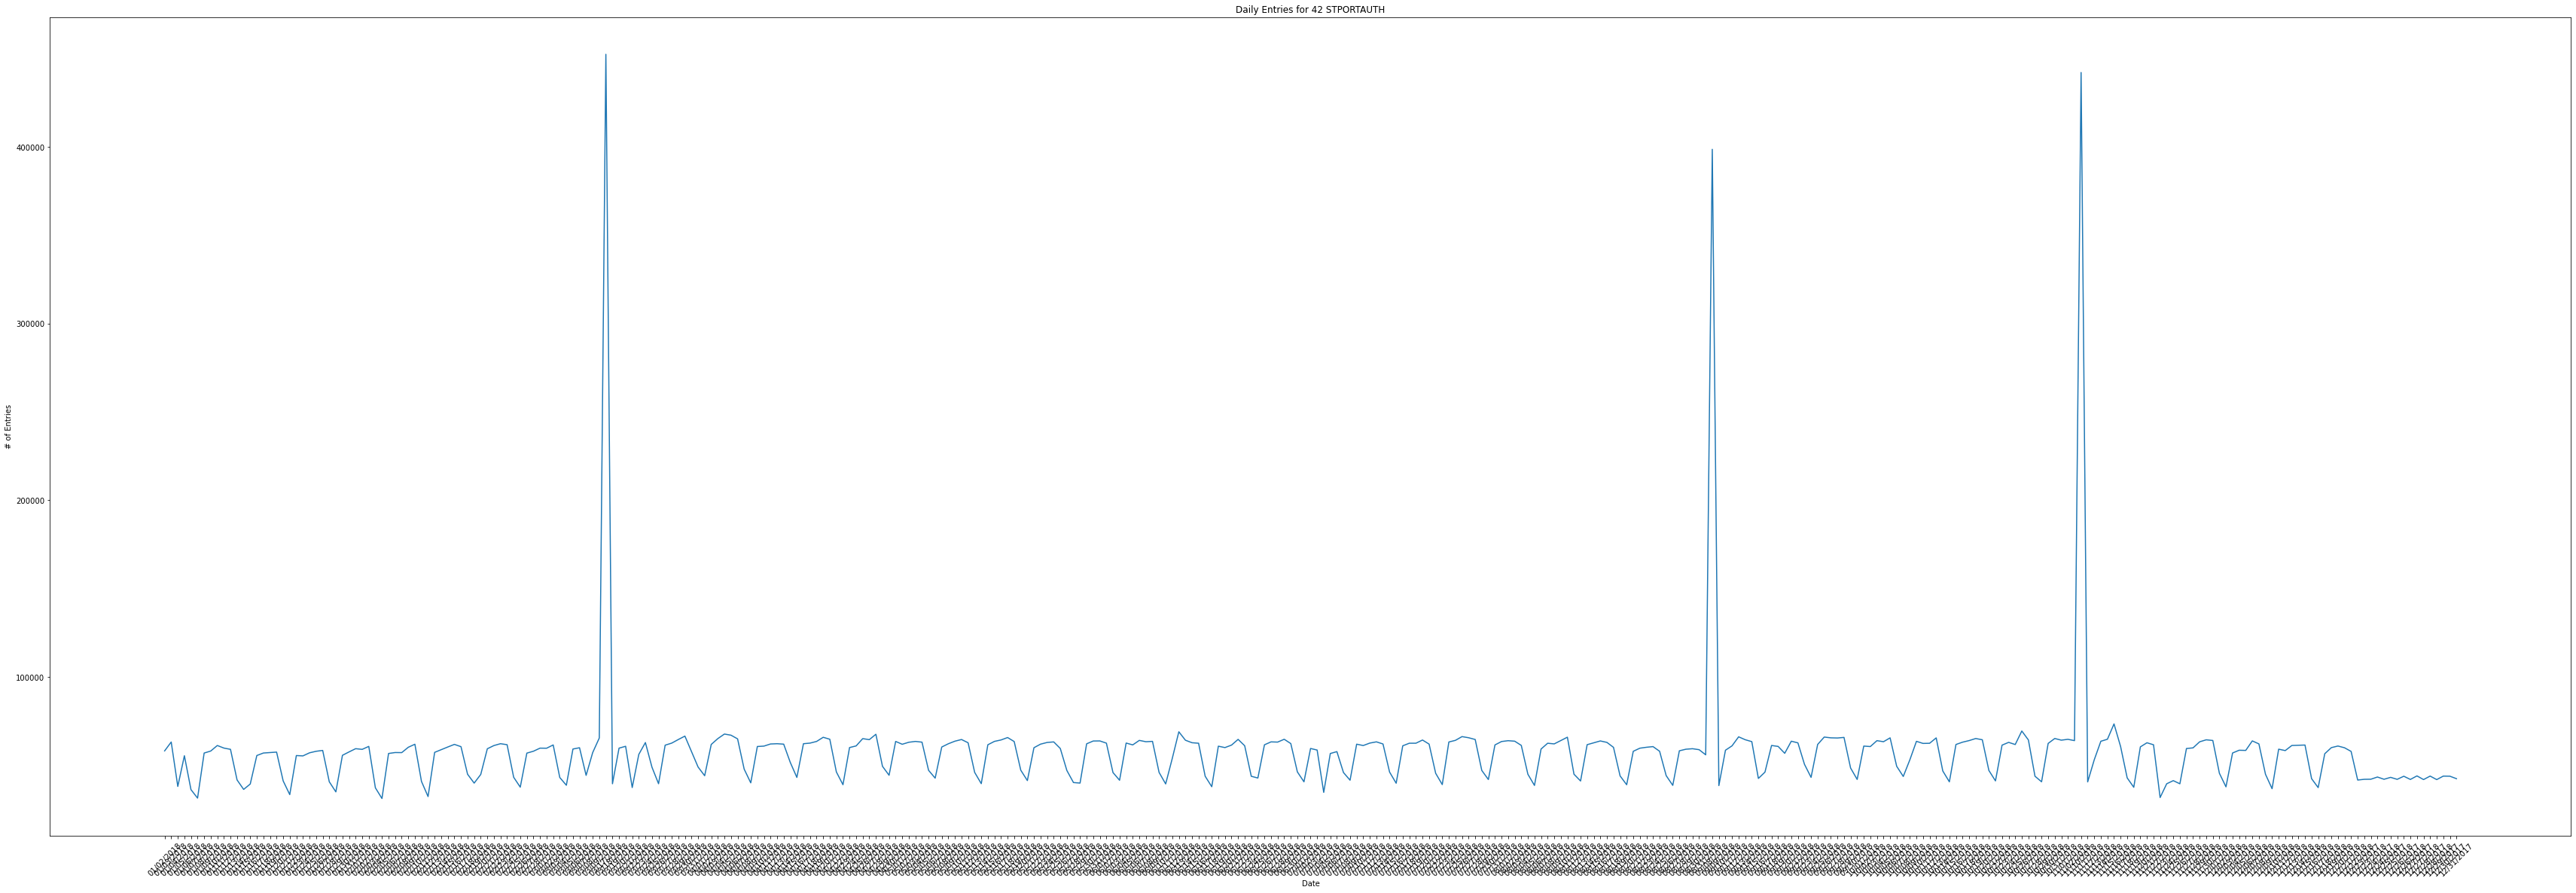

In [118]:
plt.figure(figsize=(60,20))
plt.plot(DAILY_STATION_42_STPORTAUTH['DATE'], DAILY_STATION_42_STPORTAUTH['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 42 STPORTAUTH')
plt.savefig('graph42.png')

Text(0.5, 1.0, 'Daily Entries for STUPHIN ARCHER')

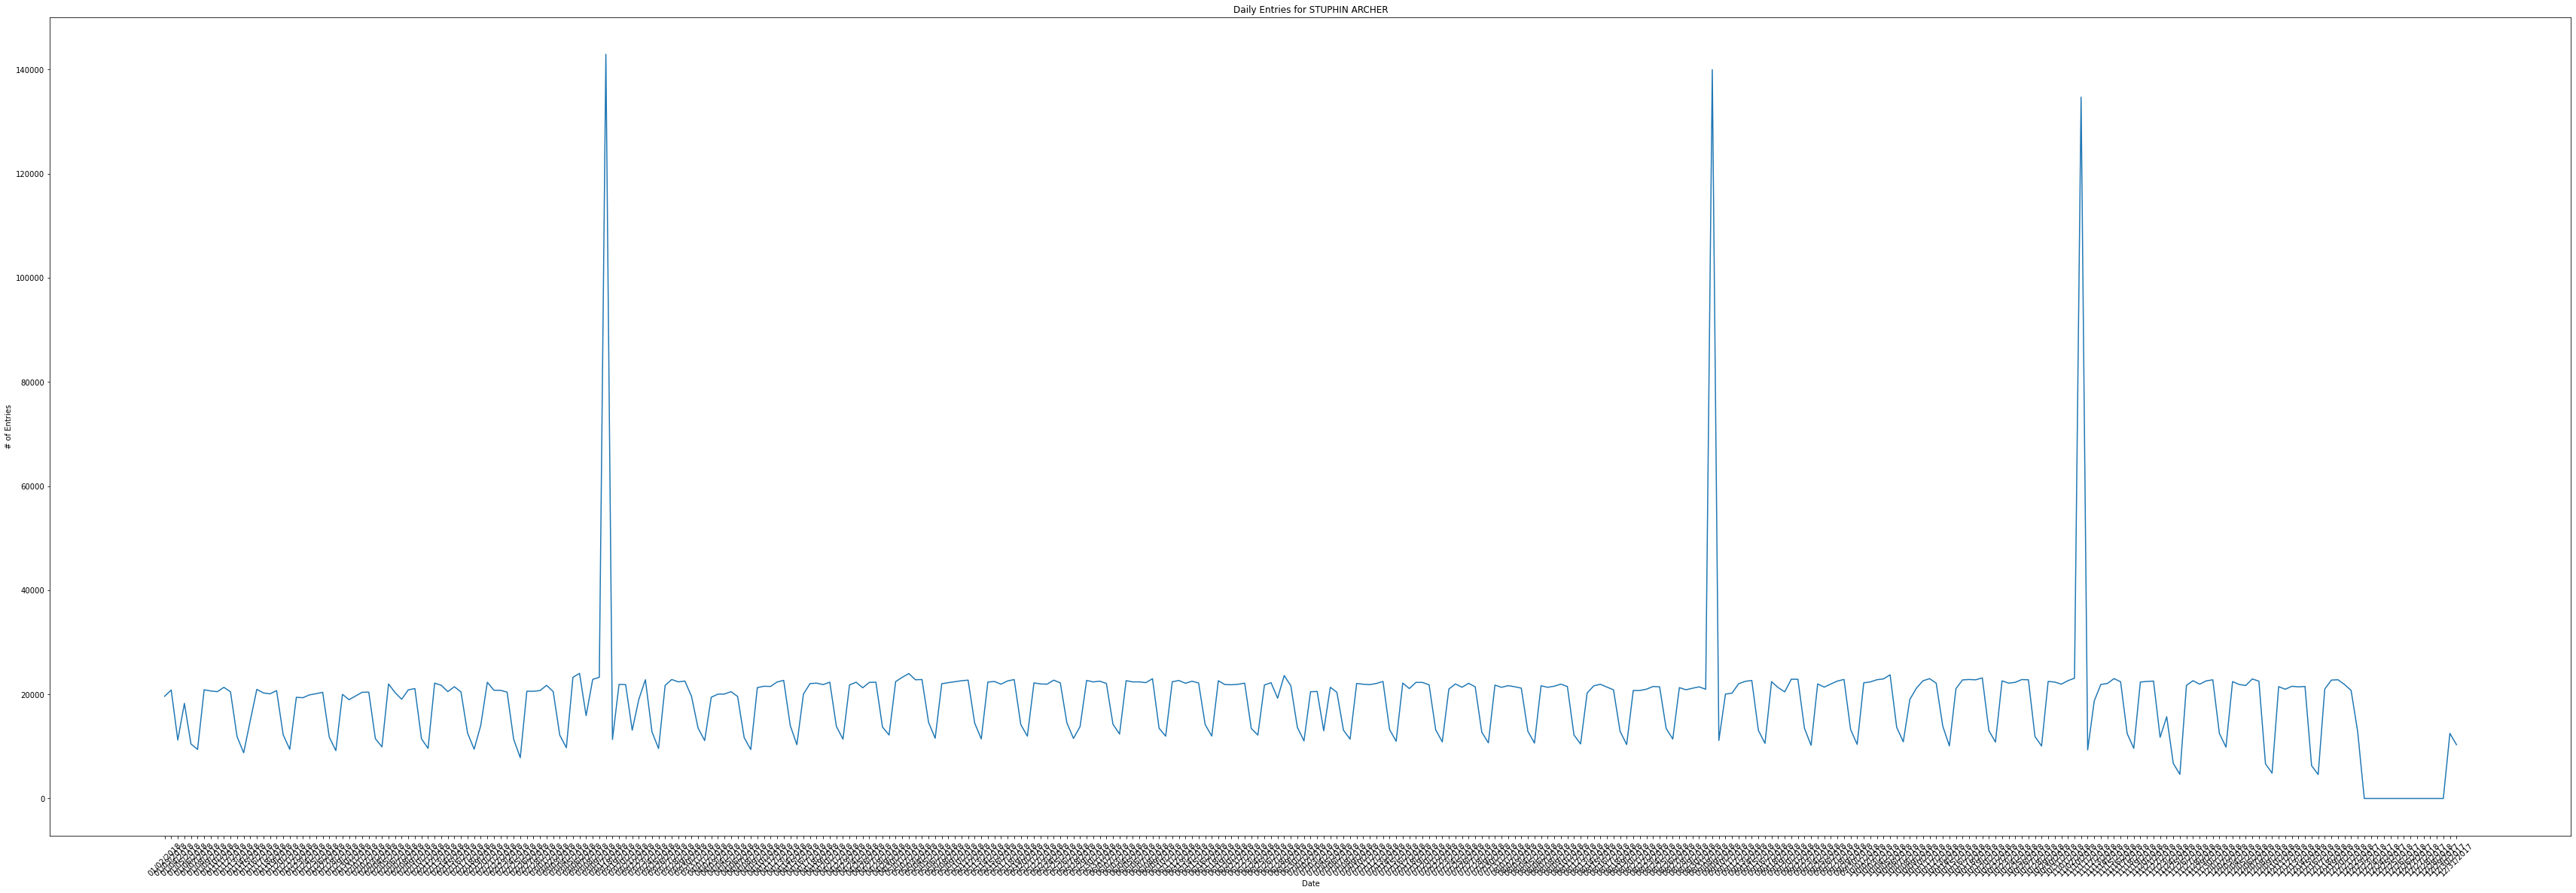

In [119]:
plt.figure(figsize=(60,20))
plt.plot(STUPHIN_ARCHER['DATE'], STUPHIN_ARCHER['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for STUPHIN ARCHER')

Text(0.5, 1.0, 'Daily Entries for JAY ST')

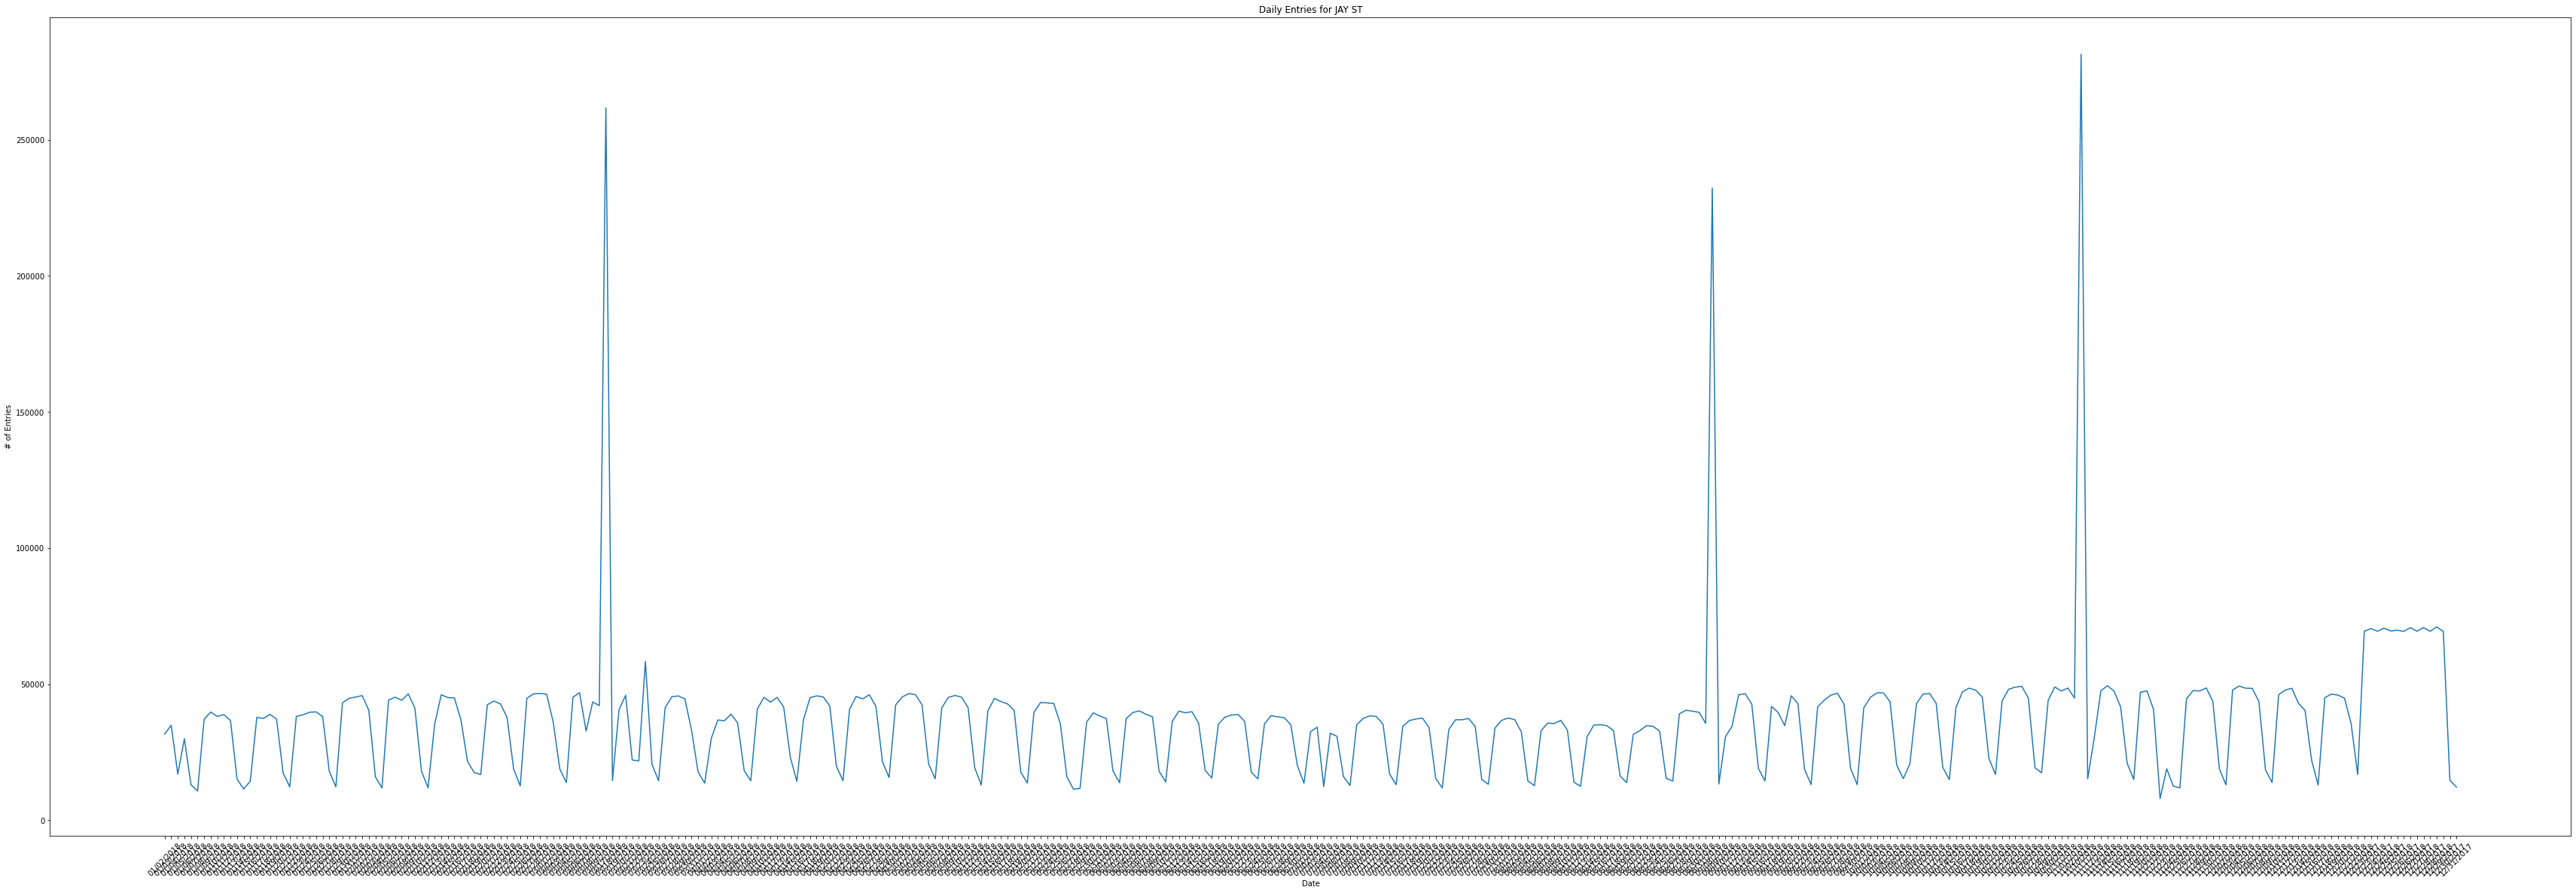

In [120]:
plt.figure(figsize=(60,20))
plt.plot(JAY_ST['DATE'], JAY_ST['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for JAY ST')

Text(0.5, 1.0, 'Daily Entries for 125 ST')

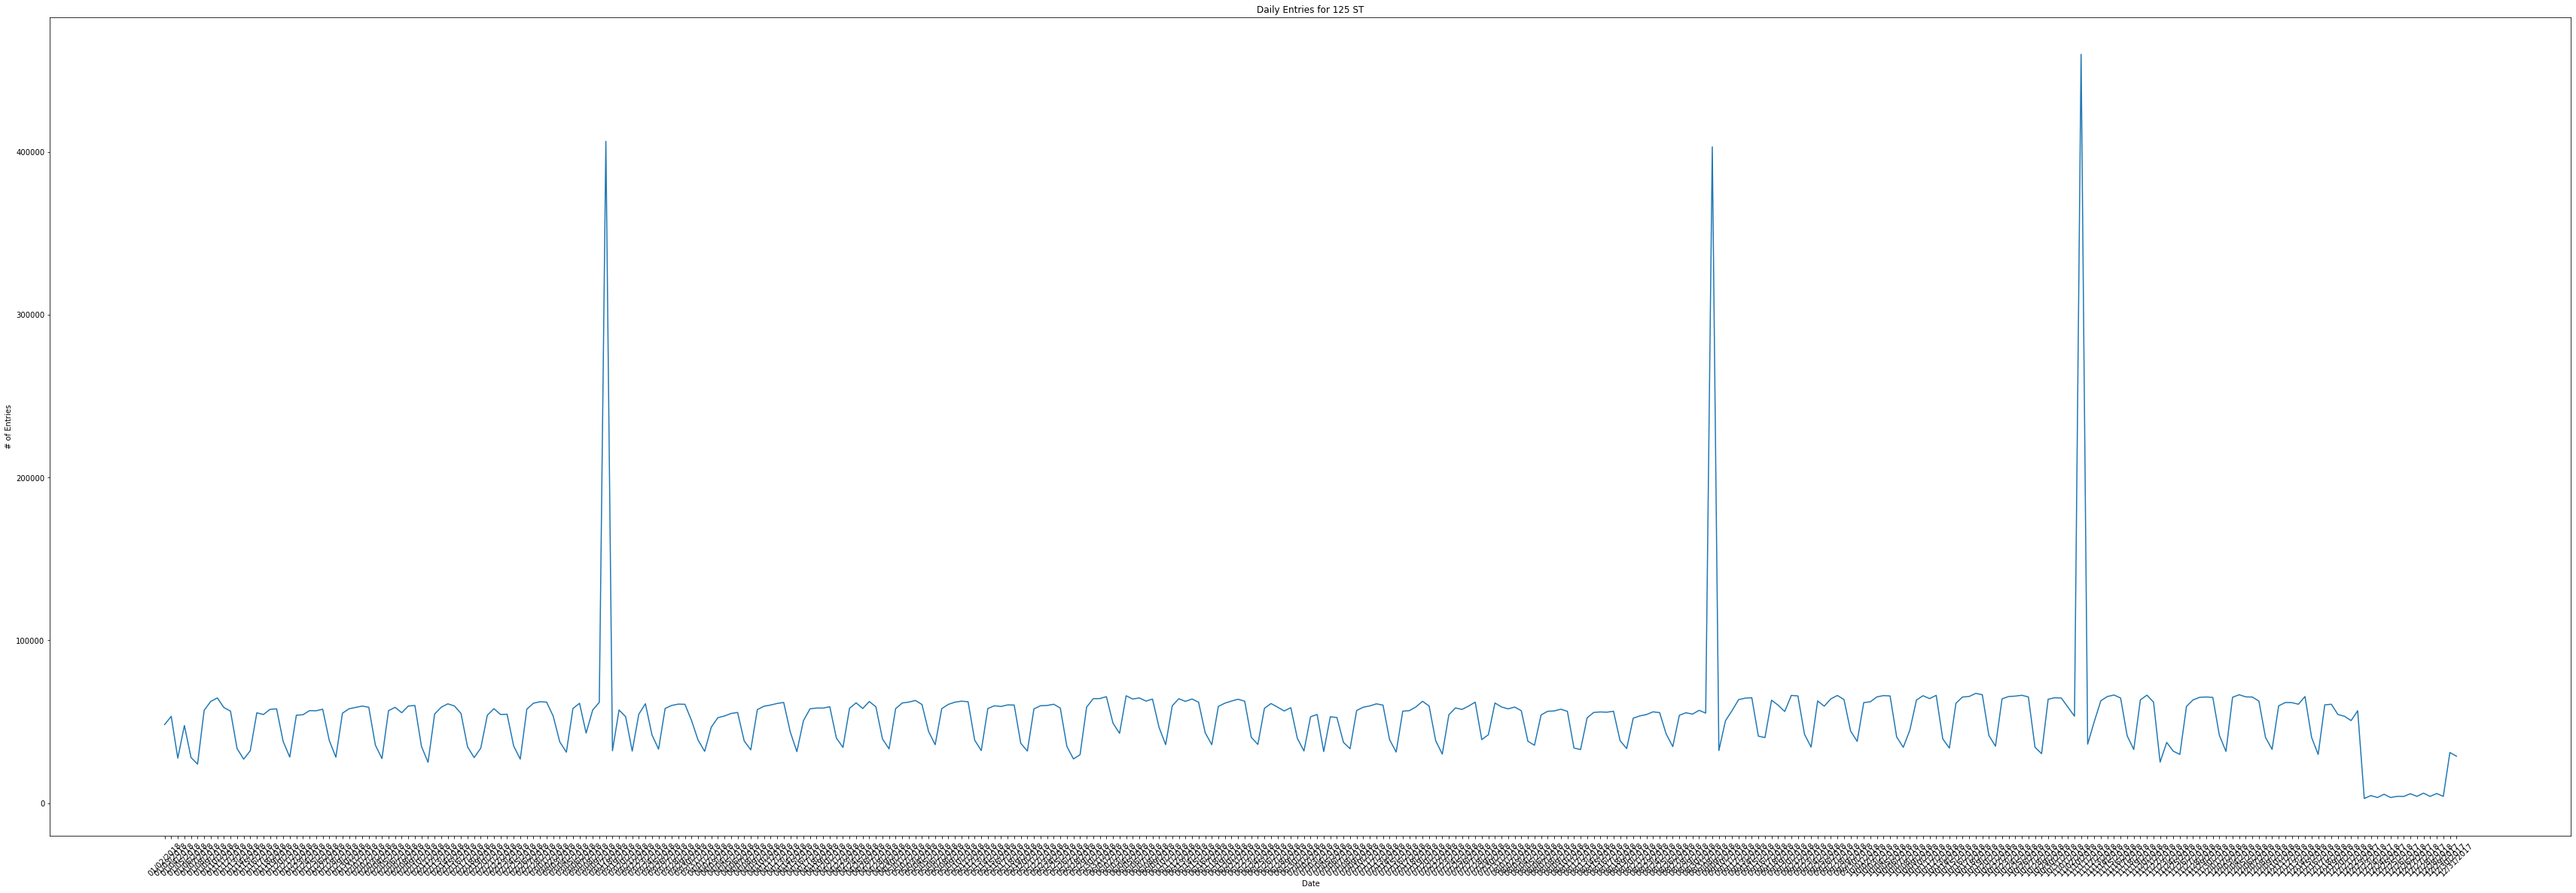

In [121]:
plt.figure(figsize=(60,20))
plt.plot(ST_125['DATE'], ST_125['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 125 ST')

Text(0.5, 1.0, 'Daily Entries for Coney Island')

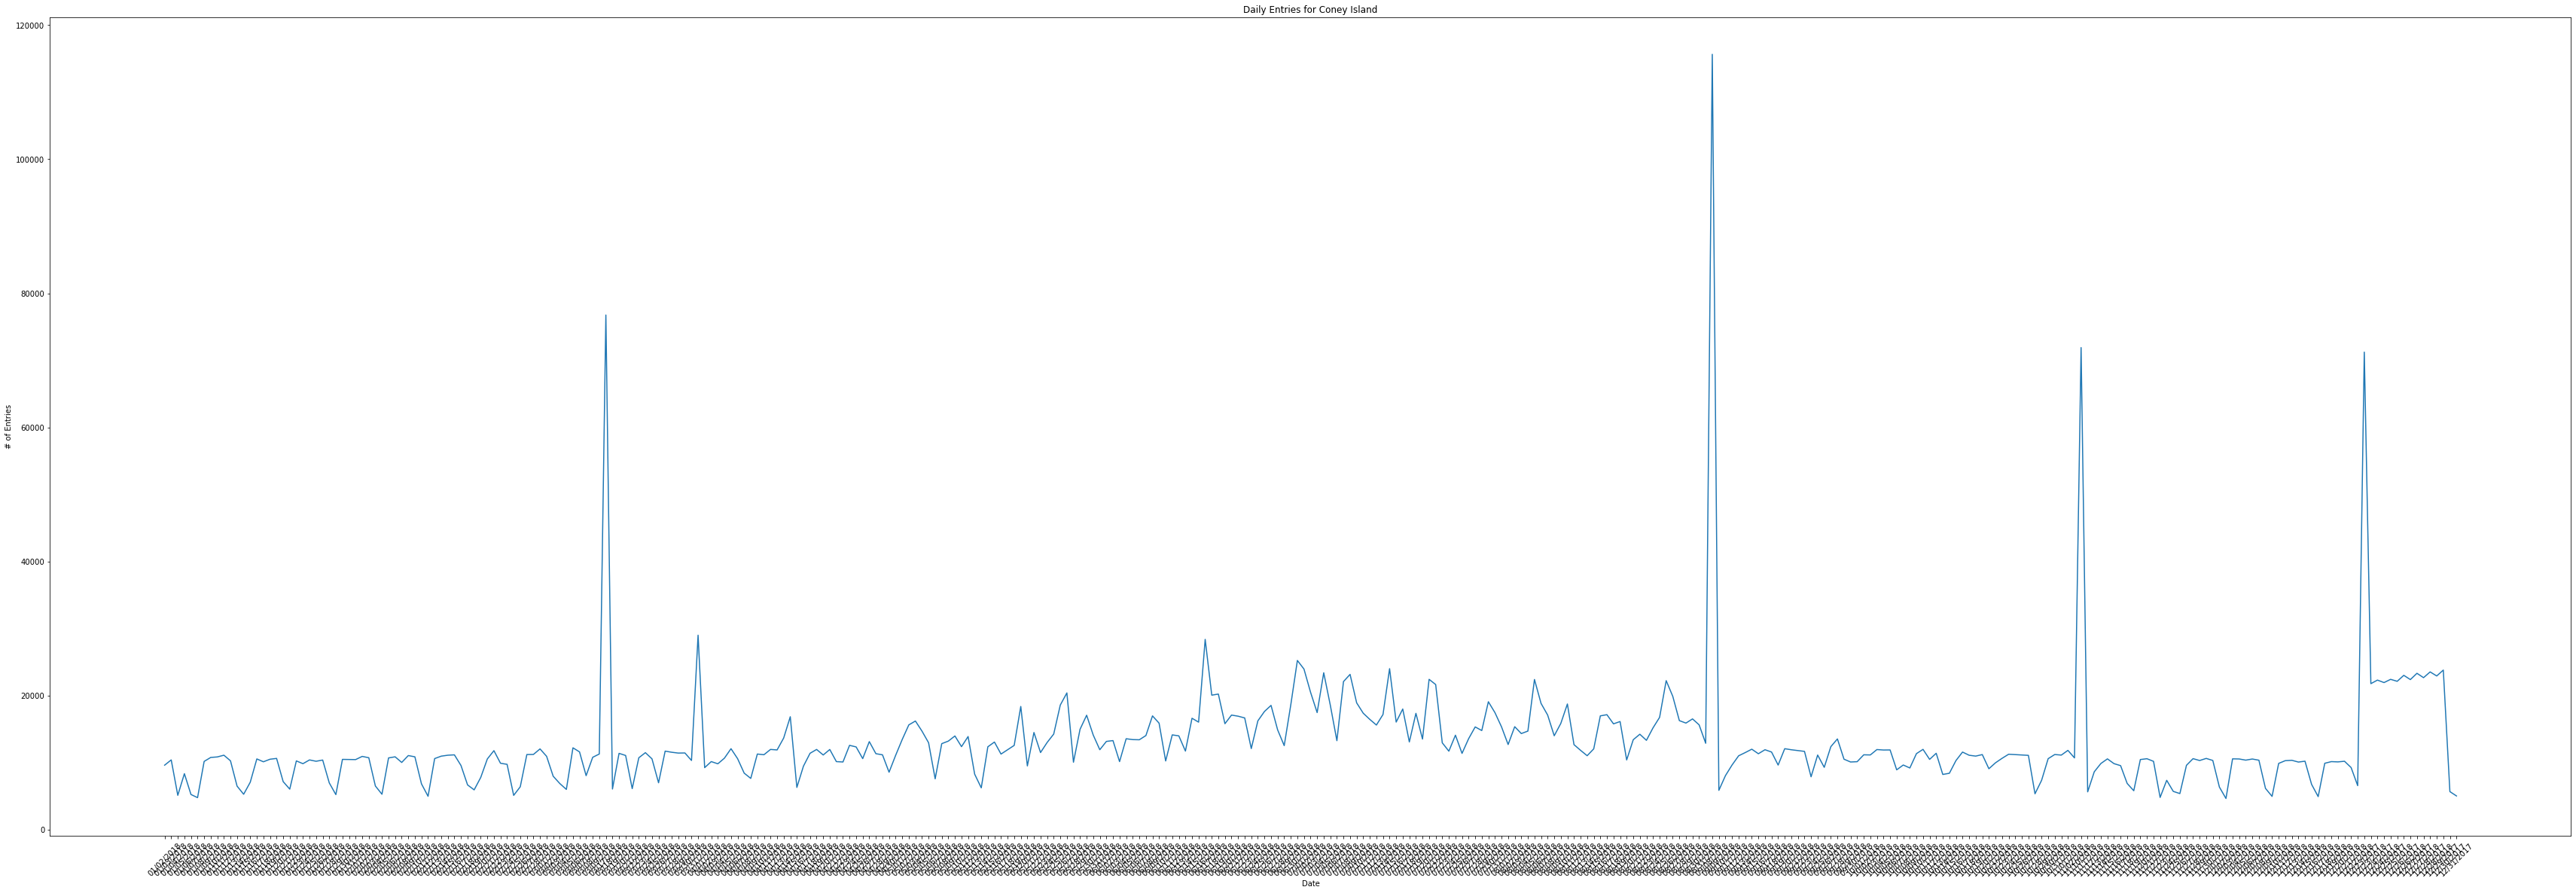

In [123]:
plt.figure(figsize=(60,20))
plt.plot(DAILY_STATION_CONEY_ISLAND['DATE'], DAILY_STATION_CONEY_ISLAND['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Coney Island')

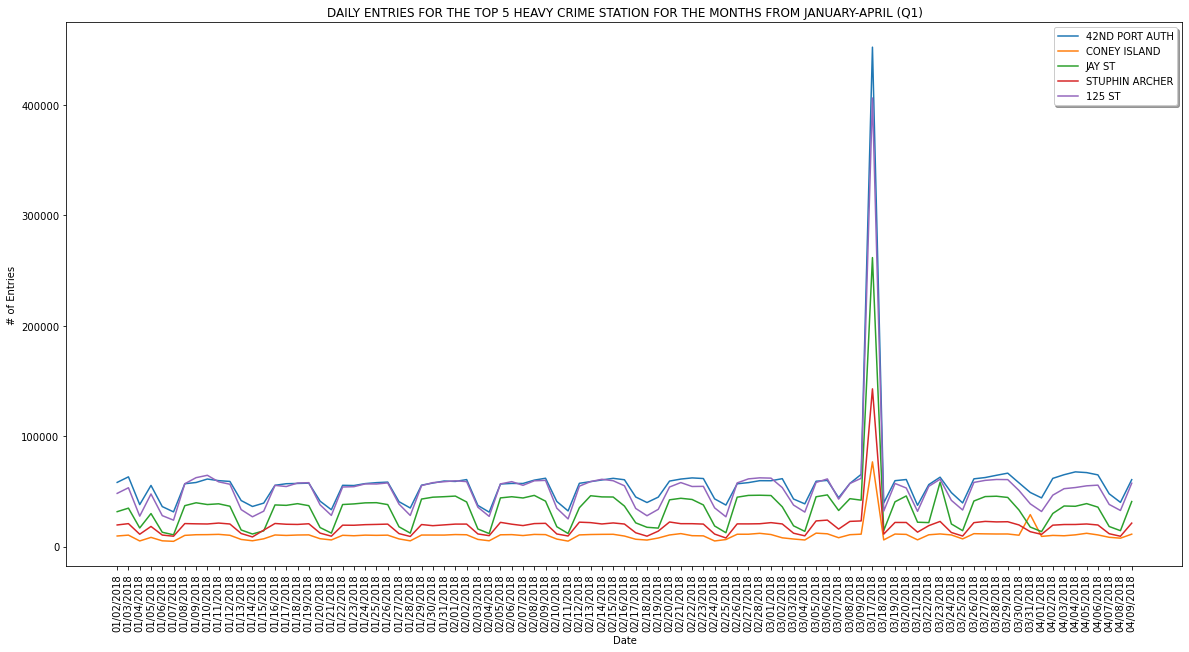

In [124]:
#ZOOMING IN ON THE FIRST QUARTER OF THE YEAR FOR ALL THE TOP 5 STATIONS
plt.figure(figsize=(20,10))
plt.plot(DAILY_STATION_42_STPORTAUTH_Q1['DATE'], DAILY_STATION_42_STPORTAUTH_Q1['DAILY_ENTRIES'])
plt.plot(DAILY_STATION_CONEY_ISLAND_Q1['DATE'], DAILY_STATION_CONEY_ISLAND_Q1['DAILY_ENTRIES'])
plt.plot(JAY_ST_Q1['DATE'], JAY_ST_Q1['DAILY_ENTRIES'])
plt.plot(STUPHIN_ARCHER_Q1['DATE'], STUPHIN_ARCHER_Q1['DAILY_ENTRIES'])
plt.plot(ST_125_Q1['DATE'], ST_125_Q1['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('DAILY ENTRIES FOR THE TOP 5 HEAVY CRIME STATION FOR THE MONTHS FROM JANUARY-APRIL (Q1)')
plt.legend(['42ND PORT AUTH','CONEY ISLAND','JAY ST','STUPHIN ARCHER','125 ST'],shadow = True, loc = 0);
plt.savefig('graphall.png')

In [125]:
#CALCULATING THE DAILY ENTRIES FOR EACH WEEK THROUGHT THE WHOLE TIME PERIOD (Q1)
DAILY_STATION_42_STPORTAUTH_Q1['DAY_OF_WEEK_NUM'] = pd.to_datetime(DAILY_STATION_42_STPORTAUTH_Q1['DATE']).dt.dayofweek
DAILY_STATION_42_STPORTAUTH_Q1['WEEK_OF_YEAR'] = pd.to_datetime(DAILY_STATION_42_STPORTAUTH_Q1['DATE']).dt.week

DAILY_STATION_CONEY_ISLAND_Q1['DAY_OF_WEEK_NUM'] = pd.to_datetime(DAILY_STATION_CONEY_ISLAND_Q1['DATE']).dt.dayofweek
DAILY_STATION_CONEY_ISLAND_Q1['WEEK_OF_YEAR'] = pd.to_datetime(DAILY_STATION_CONEY_ISLAND_Q1['DATE']).dt.week

JAY_ST_Q1['DAY_OF_WEEK_NUM'] = pd.to_datetime(JAY_ST_Q1['DATE']).dt.dayofweek
JAY_ST_Q1['WEEK_OF_YEAR'] = pd.to_datetime(JAY_ST_Q1['DATE']).dt.week

ST_125_Q1['DAY_OF_WEEK_NUM'] = pd.to_datetime(ST_125_Q1['DATE']).dt.dayofweek
ST_125_Q1['WEEK_OF_YEAR'] = pd.to_datetime(ST_125_Q1['DATE']).dt.week

STUPHIN_ARCHER_Q1['DAY_OF_WEEK_NUM'] = pd.to_datetime(STUPHIN_ARCHER_Q1['DATE']).dt.dayofweek
STUPHIN_ARCHER_Q1['WEEK_OF_YEAR'] = pd.to_datetime(STUPHIN_ARCHER_Q1['DATE']).dt.week


<ipython-input-125-659375782eff>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  DAILY_STATION_42_STPORTAUTH_Q1['WEEK_OF_YEAR'] = pd.to_datetime(DAILY_STATION_42_STPORTAUTH_Q1['DATE']).dt.week
<ipython-input-125-659375782eff>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  DAILY_STATION_CONEY_ISLAND_Q1['WEEK_OF_YEAR'] = pd.to_datetime(DAILY_STATION_CONEY_ISLAND_Q1['DATE']).dt.week
<ipython-input-125-659375782eff>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  JAY_ST_Q1['WEEK_OF_YEAR'] = pd.to_datetime(JAY_ST_Q1['DATE']).dt.week
<ipython-input-125-659375782eff>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ST_125_Q1['WEEK_OF_YEAR'] = pd.to_datetime(ST_1

Text(0.5, 1.0, 'Ridership per day for top 5 heavy crime stations for the first quarter of 2018')

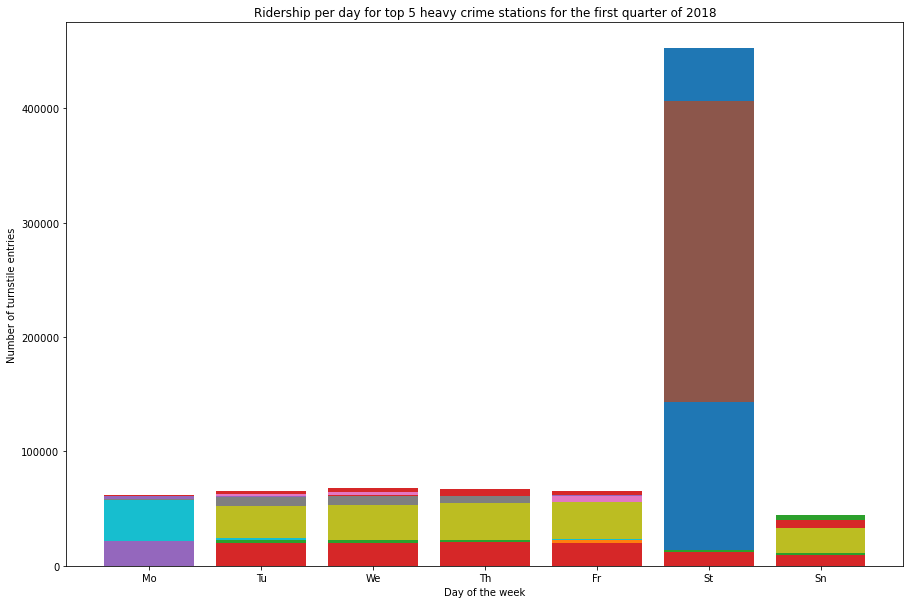

In [127]:
plt.figure(figsize=(15,10))

for i, group in DAILY_STATION_42_STPORTAUTH_Q1.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
for i, group in DAILY_STATION_CONEY_ISLAND_Q1.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
for i, group in JAY_ST_Q1.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
for i, group in ST_125_Q1.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
for i, group in STUPHIN_ARCHER_Q1.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
   
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for top 5 heavy crime stations for the first quarter of 2018')

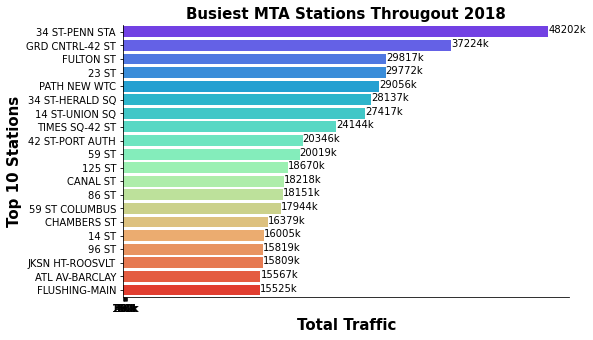

In [128]:
plt.figure(figsize=[8,5])
ax = sns.barplot(data=STATION_TOTALS.head(20).reset_index(),x='DAILY_ENTRIES',y='STATION',palette='rainbow')
plt.xlabel('Total Traffic',weight='bold',fontsize=15)
plt.ylabel('Top 10 Stations',weight='bold',fontsize=15)
plt.xticks(range(0,400001,50000),[str(int(i/1000))+'k' for i in range(0,400001,50000)])
plt.title('Busiest MTA Stations Througout 2018', weight='bold',fontsize='15')
for p in ax.patches:
        ax.annotate(str(int(p.get_width()/1000))+'k', (p.get_width(), p.get_y()+0.5))
sns.despine()
plt.savefig('graph11.png')

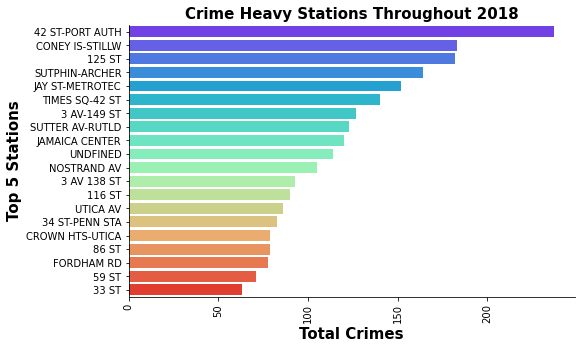

In [130]:
plt.figure(figsize=[8,5])
ax = sns.barplot(data=ARRESTASSIGNED_STATIONS.head(20).reset_index(),x='NO_OF_CRIMES',y='STATION',palette='rainbow')
plt.xlabel('Total Crimes',weight='bold',fontsize=15)
plt.ylabel('Top 5 Stations',weight='bold',fontsize=15)
plt.title('Crime Heavy Stations Throughout 2018', weight='bold',fontsize='15')
plt.xticks(rotation=90)
sns.despine()
plt.savefig('graph9.png')

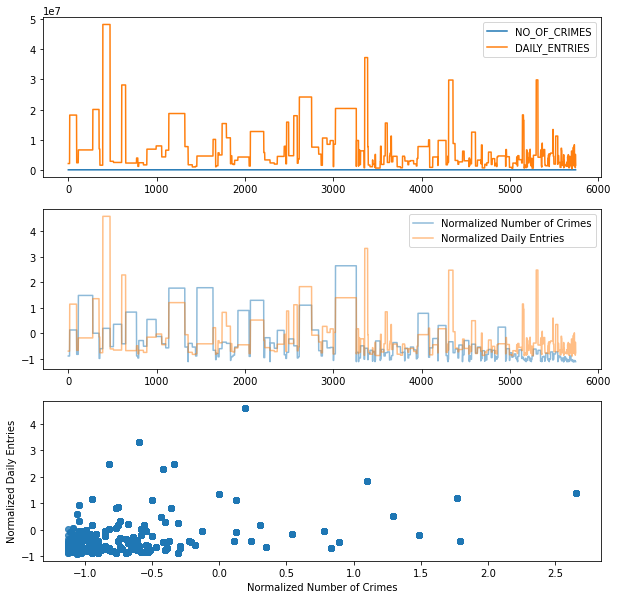

In [132]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.plot(DF_STATIONS_CRIMES_SUBSET['NO_OF_CRIMES'])
plt.plot(DF_STATIONS_CRIMES_SUBSET['DAILY_ENTRIES'])
plt.legend(['NO_OF_CRIMES','DAILY_ENTRIES'])
plt.subplot(3,1,2)
plt.plot(NOOFCRIMES_NORM,alpha = 0.5)
plt.plot(DAILYENTRIES_NORM,alpha = 0.5)
plt.legend(['Normalized Number of Crimes','Normalized Daily Entries'])
plt.subplot(3,1,3)
plt.scatter(NOOFCRIMES_NORM,DAILYENTRIES_NORM,alpha = 0.8)
plt.xlabel('Normalized Number of Crimes')
plt.ylabel('Normalized Daily Entries')
plt.savefig('graph7.png')

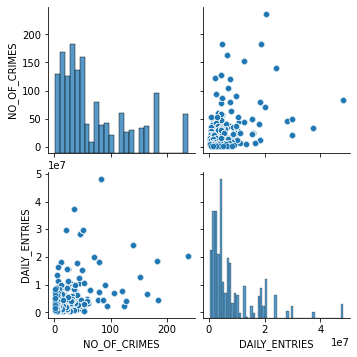

In [131]:
sns.pairplot(DF_CRIMES_IN_STATIONS);
plt.savefig('graph8.png')

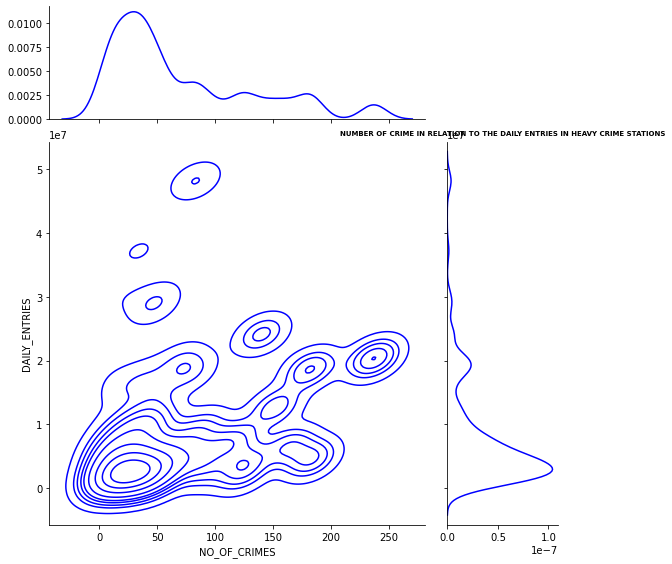

In [147]:
sns.jointplot(x="NO_OF_CRIMES", y="DAILY_ENTRIES", kind="kde",dropna = True ,color='b',height=8, ratio=3, marginal_ticks=True, data=DF_CRIMES_IN_STATIONS);
plt.title('NUMBER OF CRIME IN RELATION TO THE DAILY ENTRIES IN HEAVY CRIME STATIONS', weight='bold',fontsize='7')
plt.xlabel('# of Crimes')
plt.ylabel('Daily Entries')
plt.savefig('graph6.png')

In [138]:
AVGOFENTRIES = DF_CRIMES_IN_STATIONS.groupby(by = ['STATION']).mean()# avg of entries and exits to each stations to plot the heatmap
AVGOFENTRIES5=AVGOFENTRIES.head(5)

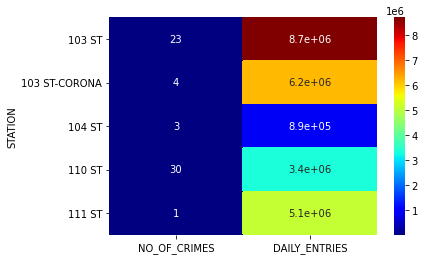

In [139]:
sns.heatmap(AVGOFENTRIES5,cmap='jet',annot=True);
plt.savefig('graph5.png')

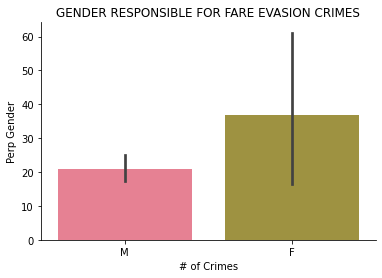

In [146]:
sns.barplot(x = 'PERP_SEX',y='NO_OF_CRIMES',data=CRIMESGROUPBYSTATION,palette = sns.color_palette("husl", 5));
sns.despine()
plt.xlabel('# of Crimes')
plt.ylabel('Perp Gender')
plt.title('GENDER RESPONSIBLE FOR FARE EVASION CRIMES');
plt.savefig('graph4.png')

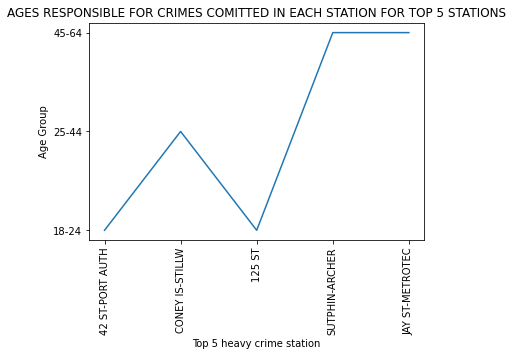

In [152]:
plt.plot(CRIMESGROUPBYSTATION5['STATION'],CRIMESGROUPBYSTATION5['AGE_GROUP']);
plt.xticks(rotation=90)
plt.title('AGES RESPONSIBLE FOR CRIMES COMITTED IN EACH STATION FOR TOP 5 STATIONS');
plt.ylabel('Age Group')
plt.xlabel('Top 5 heavy crime station')
plt.savefig('graph3.png')

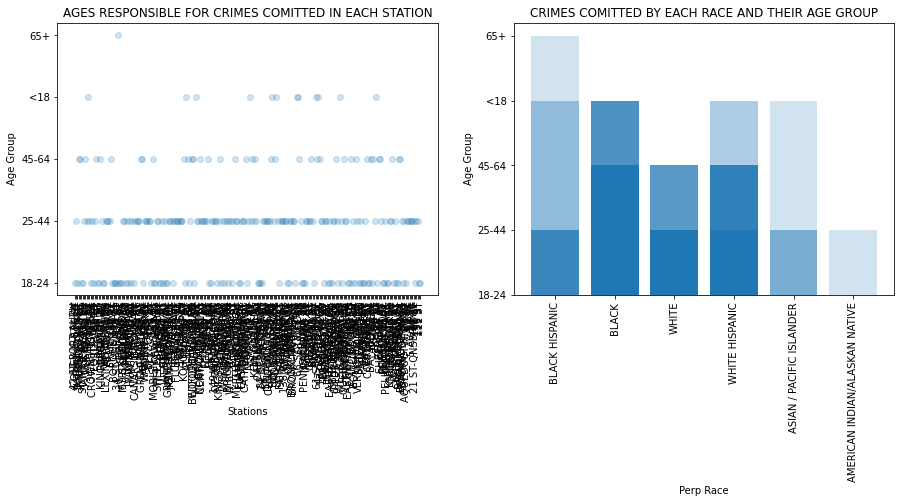

In [153]:

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.scatter(CRIMESGROUPBYSTATION['STATION'],CRIMESGROUPBYSTATION['AGE_GROUP'],alpha = 0.2);
plt.xticks(rotation=90)
plt.title('AGES RESPONSIBLE FOR CRIMES COMITTED IN EACH STATION');
plt.xlabel('Stations')
plt.ylabel('Age Group')

plt.subplot(1,2,2)
plt.bar(CRIMESGROUPBYSTATION['PERP_RACE'],CRIMESGROUPBYSTATION['AGE_GROUP'],alpha = 0.2);
plt.xticks(rotation=90)
plt.title('CRIMES COMITTED BY EACH RACE AND THEIR AGE GROUP');
plt.xlabel('Perp Race')
plt.ylabel('Age Group')
plt.savefig('graph2.png')

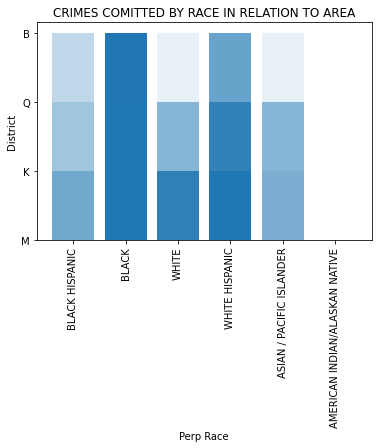

In [154]:
plt.bar(CRIMESGROUPBYSTATION['PERP_RACE'],CRIMESGROUPBYSTATION['ARREST__BORO'],alpha = 0.1);
plt.xticks(rotation=90)
plt.title('CRIMES COMITTED BY RACE IN RELATION TO AREA');
plt.xlabel('Perp Race')
plt.ylabel('District')
plt.savefig('graph1.png')

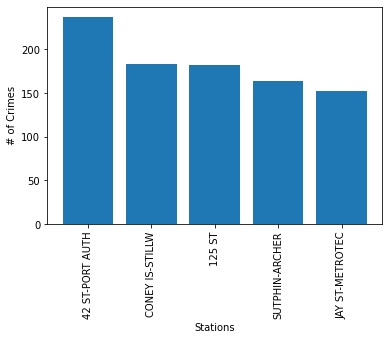

In [156]:
#TOP 5 STATIOINS WHERE MOST FARE EVASION CRIMES HAPPEN
plt.bar(x=ARRESTASSIGNED_STATIONS['STATION'][:5], height=ARRESTASSIGNED_STATIONS['NO_OF_CRIMES'][:5])
plt.xticks(rotation=90)
plt.ylabel('# of Crimes')
plt.xlabel('Stations')
plt.savefig('graph0909.png')